<a href="https://colab.research.google.com/github/vkgarapa/Default-risk-Case-Study/blob/master/AT%26T.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Challenge

Objective: Build a solution using the crime and justice statistics of Scotland to influence a company to invest in scotland. 

# Importing Packages

In [0]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import numpy as np
import lxml.html as lh
!pip install wikipedia
!pip install bs4
import wikipedia as wp
from bs4 import BeautifulSoup
import requests
!pip install folium
import folium
!pip install geocoder
import geocoder
!pip install geopy
import io
from shapely.geometry import Point
!pip install geopandas
import geopandas as gpd
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

#Imputation packages
!pip install impyute===0.0.7
import impyute

#Time series package
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import statsmodels
from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

# clustering packages
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering

# Data Compilation

## Data Loading

### Civil Cases

In [0]:
civil_data = pd.read_excel(r'/content/Cleaned_data_1.xlsx')
civil_data = civil_data.transpose()
civil_data.columns = civil_data.iloc[0]
civil_data.drop(civil_data.index[0], inplace=True)
civil_data

Date,Initiated_Court of Session,Initiated_Sheriff courts,Initiated_Sheriff Personal Injury Court,Disposed_Court of Session,Disposed_Sheriff courts,Disposed_Sheriff Personal Injury Court,CS_GD_Initiated,CS_GD_Disposed,CS_PD_Initiated,CS_PD_Disposed,CS_IH_Initiated,CS_IH_Disposed,CS_T_Initiated,CS_T_Disposed,SC_I_Ordinary cause,SC_I_Summary cause,SC_I_Small claim,SC_I_Simple procedure,SC_I_Total initiated,SC_D_Ordinary cause,SC_D_Summary cause,SC_D_Small claim,SC_D_Simple procedure,SC_D_Total disposed,"SCS_I_Tayside, Central and Fife",SCS_I_Glasgow and Strathkelvin,"SCS_I_South Strathclyde, Dumfries and Galloway",SCS_I_Lothian and Borders,SCS_I_North Strathclyde,"SCS_I_Grampian, Highlands and Islands",SCS_I_Scotland total initiated,"SCS_D_Tayside, Central and Fife",SCS_D_Glasgow and Strathkelvin,"SCS_D_South Strathclyde, Dumfries and Galloway",SCS_D_Lothian and Borders,SCS_D_North Strathclyde,"SCS_D_Grampian, Highlands and Islands",SCS_D_Scotland total disposed,FPC_I_Divorce / dissolution,FPC_I_Parental responsibilities & rights,...,PJR_CS_I_Total,PJR_CS_D_Environmental,PJR_CS_D_Housing,PJR_CS_D_Immigrants,PJR_CS_D_Licensing board,PJR_CS_D_Planning permission,PJR_CS_D_Prison authorities,PJR_CS_D_Social security benefits,PJR_CS_D_Other,PJR_CS_D_Total,CL_I_Repossession,CL_I_Damages,CL_I_Personal Injury,CL_I_Family,CL_I_Eviction,CL_I_Debt,CL_I_Other,CL_I_All cases,CLAGF_Appeals - family,CLAGF_Contact/parentage,CLAGF_Divorce/separation,CLAGF_Property/monetary,CLAGF_Protective order,CLAGF_Residence,CLAGF_Family/matrimonial - other,CLAGF_Total civil legal aid grants - family,CLAGNF_Adults with incapacity,CLAGNF_Appeals - other,CLAGNF_Breach of contract,CLAGNF_Debt,CLAGNF_Discrimination,CLAGNF_Fatal accident inquiries,CLAGNF_Housing/recovery of heritable property,CLAGNF_Immigration and asylum,CLAGNF_Judicial review,CLAGNF_Medical negligence,CLAGNF_Reparation,CLAGNF_Other,CLAGNF_Total civil legal aid grants - non-family,CLAG_Total civil legal aid grants
2008,5329,126304,0,4022,111541,0,3736,2961,1473,988,120,73,5329,4022,46477,32736,47091,0,126304,38902,31231,41408,0,111541,22456,24919,22949,24469,17177,14334,126304,20160,21315,20829,20384,15687,13166,111541,11752,2364,...,232,0,5,153,1,4,15,0,34,212,10141,4627,6988,14836,19944,65798,9305,131639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,6102,111737,0,4356,104831,0,4429,3167,1555,1094,118,95,6102,4356,42823,27464,41450,0,111737,33911,27568,43352,0,104831,20204,22389,19457,21439,14907,13341,111737,18730,20059,18759,20948,13455,12880,104831,11159,2742,...,378,0,1,168,1,7,18,0,32,227,8266,4851,9766,14733,16528,55931,7768,117843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,5141,92308,0,4295,87504,0,3688,3187,1358,1035,95,73,5141,4295,34123,23799,34386,0,92308,29768,24036,33700,0,87504,16816,17784,16869,16211,12954,11674,92308,16081,16134,15979,15957,12218,11135,87504,11018,2713,...,342,1,3,182,0,5,12,0,39,242,5224,4131,9099,14496,14160,45375,5939,98424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,4718,80502,0,4856,77147,0,3354,3455,1223,1299,141,102,4718,4856,26021,22783,31698,0,80502,23410,22434,31303,0,77147,14759,16305,14171,14148,10577,10542,80502,14343,15630,13749,13494,9921,10010,77147,10678,2272,...,243,2,1,267,2,11,95,0,34,412,6752,3684,7810,13679,13979,40250,5739,91893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,4911,72510,0,4712,68781,0,3536,3405,1211,1191,164,116,4911,4712,24957,18510,29043,0,72510,20733,19831,28217,0,68781,14006,14313,12968,11554,9932,9737,72510,13268,13544,12466,11595,8803,9105,68781,10355,2751,...,293,1,0,229,0,12,101,1,26,370,5385,3278,8693,13862,10532,35899,5093,82742,NaN,3590,2295,343,530,1412,643,8813,2663,126,30,125,NaN,8,758,173,68,58,231,374,4614,13427
2013,4561,72511,0,4911,65356,0,3258,3656,1179,1126,124,129,4561,4911,24026,18852,29633,0,72511,19575,17876,2790

In [0]:
civil_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2008 to 2017
Columns: 170 entries, Initiated_Court of Session to CLAG_Total civil legal aid grants
dtypes: object(170)
memory usage: 13.4+ KB


In [0]:
civil_data = civil_data.astype("float64")
#civil_data.index = civil_data.index.astype("float64")
#civil_data.index = pd.to_datetime(civil_data.index,yearfirst=True)
civil_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2008 to 2017
Columns: 170 entries, Initiated_Court of Session to CLAG_Total civil legal aid grants
dtypes: float64(170)
memory usage: 13.4+ KB


In [0]:
civil_data2 = pd.read_excel(r'/content/Cleaned_Data_2.xlsx',"Sheet2")
civil_data2.columns = civil_data2.iloc[0]
civil_data2.drop(civil_data2.index[0], inplace=True)
civil_data2.index = pd.to_datetime(civil_data2["Year"], format="%Y")
civil_data2.drop(columns=['Year'],axis=1, inplace=True)
civil_data2.index = pd.to_datetime(civil_data2.index)
civil_data2 = civil_data2.astype("float64")
civil_data2.head()

,General Department1,Petition Department,CS_Total,Ordinary Cause2,Summary Cause3,Small Claim4,Simple Procedure5,SC_Total
Year,,,,,,,,
1979-01-01,NaN,NaN,15036.0,17761.0,116981.0,NaN,NaN,134742.0
1980-01-01,NaN,NaN,17362.0,26235.0,131216.0,NaN,NaN,157451.0
1981-01-01,NaN,NaN,19124.0,23088.0,114790.0,NaN,NaN,137878.0
1982-01-01,NaN,NaN,20341.0,22536.0,143833.0,NaN,NaN,166369.0
1983-01-01,NaN,NaN,18338.0,25534.0,130462.0,NaN,NaN,155996.0


In [0]:
civil_data2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43 entries, 1979-01-01 to 2021-01-01
Data columns (total 8 columns):
General Department1    15 non-null float64
Petition Department    15 non-null float64
CS_Total               39 non-null float64
Ordinary Cause2        39 non-null float64
Summary Cause3         39 non-null float64
Small Claim4           29 non-null float64
Simple Procedure5      2 non-null float64
SC_Total               39 non-null float64
dtypes: float64(8)
memory usage: 3.0 KB


In [0]:
civil_data2.columns

Index(['General Department1', 'Petition Department', 'CS_Total',
       'Ordinary Cause2', 'Summary Cause3', 'Small Claim4',
       'Simple Procedure5', 'SC_Total'],
      dtype='object', name=0)

### Criminal Justice

In [0]:
#Criminal Justice
cj_data1 = pd.read_excel(r'/content/CJS_Clean_Data.xlsx',"Sheet1")
cj_data1 = cj_data1.transpose()
cj_data1.columns = cj_data1.iloc[0]
cj_data1.drop(cj_data1.index[0], inplace=True)
cj_data1.index = pd.to_datetime(cj_data1.index, format="%Y")
cj_data1 = cj_data1.astype("float64")
cj_data1.head()

Date,Diversion from prosecution_Cases commenced,Diversion from prosecution_Individuals,Diversion from prosecution_Cases successfully completed,Requests from court for bail information,Bail supervision cases commenced,Bail supervision individuals,CJ social work reports_Total reports submitted (including supplementaries),CJ social work reports_Individuals with reports submitted,CJ social work reports_Supplementary reports submitted,Statutory throughcare_Cases commenced (custody),Statutory throughcare_Cases commenced (community),Statutory throughcare_Cases completed (community),Statutory throughcare_Cases in force at 31 March (custody/community),Voluntary throughcare (assistance)_Cases commenced,Voluntary throughcare (assistance)_Individuals who received assistance,Pre-release reports_Total,Pre-release reports_Home leave reports,Pre-release reports_Home circumstance reports (parole/non-parole)
2011-01-01,1260.0,1231.0,898.0,9709.0,497.0,467.0,36367.0,26922.0,4488.0,1072.0,1047.0,944.0,5576.0,2625.0,2428.0,3425.0,1923.0,1502.0
2012-01-01,1326.0,1309.0,1078.0,8662.0,411.0,397.0,32558.0,24785.0,4536.0,965.0,1001.0,927.0,5778.0,2597.0,2464.0,2982.0,1500.0,1482.0
2013-01-01,1710.0,1657.0,1374.0,6874.0,417.0,400.0,31406.0,23740.0,3632.0,1048.0,1027.0,911.0,6003.0,2489.0,2327.0,3184.0,1597.0,1587.0
2014-01-01,1869.0,1812.0,1355.0,8006.0,407.0,390.0,30838.0,22120.0,4235.0,1033.0,1085.0,942.0,5900.0,2663.0,2429.0,3056.0,1462.0,1594.0
2015-01-01,1859.0,1787.0,1330.0,7278.0,355.0,318.0,29846.0,22667.0,2858.0,1027.0,982.0,982.0,5802.0,2537.0,2343.0,3199.0,1513.0,1686.0


In [0]:
cj_data2 = pd.read_excel(r'/content/CJS_Clean_Data.xlsx',"Sheet3")
cj_data2 = cj_data2.transpose()
cj_data2.columns = cj_data2.iloc[0]
cj_data2.drop(cj_data2.index[0], inplace=True)
cj_data2.index = pd.to_datetime(cj_data2.index, format="%Y")
cj_data2 = cj_data2.astype("float64")
cj_data2.head()

Date,Total,Age group_16-17,Age group_18-20,Age group_21-25,Age group_26-30,Age group_31-40,Age group_Over 40,Gender_Males,Gender_Females,Employment status,Employment status_Full-time education,Employment status_Employed/self employed,Employment status_Unemployed,Employment status_Government training scheme,Employment status_Economically inactive3,Employment status_Other,Ethnicity_White,EthnicityAsian,"Ethnicity_African, Caribbean or Black",Ethnicity_Mixed,Ethnicity_Other,Ethnicity_Not known/provided
2013-01-01,27774.0,1173.0,3445.0,5443.0,4588.0,6818.0,6307.0,23006.0,4768.0,NaN,442.0,5944.0,14825.0,121.0,3754.0,2688.0,24364.0,313.0,165.0,96.0,288.0,2548.0
2014-01-01,26603.0,926.0,3140.0,4996.0,4390.0,6768.0,6383.0,22115.0,4488.0,NaN,457.0,5733.0,13865.0,111.0,4013.0,2424.0,23682.0,275.0,154.0,70.0,243.0,2179.0
2015-01-01,26988.0,945.0,3133.0,4777.0,4569.0,7097.0,6467.0,22417.0,4571.0,NaN,438.0,6340.0,13150.0,126.0,4140.0,2794.0,23211.0,310.0,156.0,55.0,287.0,2969.0
2016-01-01,27012.0,925.0,2906.0,4768.0,4503.0,7278.0,6632.0,22515.0,4497.0,NaN,490.0,5991.0,13551.0,130.0,4039.0,2811.0,23658.0,311.0,182.0,72.0,303.0,2486.0
2017-01-01,25673.0,854.0,2475.0,4299.0,4364.0,7228.0,6453.0,21383.0,4290.0,NaN,396.0,5409.0,13569.0,129.0,3529.0,2641.0,22381.0,285.0,173.0,65.0,265.0,2504.0


In [0]:
cj_data3 = pd.read_excel(r'/content/CJS_Clean_Data.xlsx',"Sheet4")
cj_data3 = cj_data3.transpose()
cj_data3.columns = cj_data3.iloc[0]
cj_data3.drop(cj_data3.index[0], inplace=True)
cj_data3.index = pd.to_datetime(cj_data3.index, format="%Y")
cj_data3 = cj_data3.astype("float64")
cj_data3.head()

Date,Total,Monetary penalty,Other community penalty,"Community payback order: unpaid work, no supervision","Community payback order: supervision, no unpaid work",Community payback order: unpaid work and supervision,Restriction of liberty order,Deferment for DTTO assessment,Custody,Custody: extended sentence,Custody: supervised release order,Warrant for apprehension / recall,Sentence deferred: 3 months or more,Admonition,Absolute discharge,Other,Outcome not yet known
2013-01-01,27774.0,1965.0,297.0,3759.0,2852.0,4915.0,458.0,288.0,4515.0,150.0,180.0,622.0,2259.0,905.0,24.0,3024.0,1584.0
2014-01-01,26603.0,1798.0,263.0,3564.0,3318.0,4280.0,429.0,209.0,4240.0,136.0,227.0,552.0,1956.0,913.0,17.0,2875.0,1826.0
2015-01-01,26988.0,1828.0,257.0,3751.0,3392.0,4446.0,695.0,228.0,4122.0,105.0,232.0,544.0,2046.0,905.0,16.0,2315.0,2106.0
2016-01-01,27012.0,1866.0,261.0,3499.0,3246.0,4666.0,975.0,225.0,4092.0,124.0,209.0,582.0,2211.0,941.0,32.0,2451.0,1632.0
2017-01-01,25673.0,1668.0,410.0,3053.0,3263.0,4453.0,1279.0,211.0,3717.0,122.0,224.0,520.0,2009.0,810.0,22.0,2455.0,1457.0


In [0]:
cj_data4 = pd.read_excel(r'/content/CJS_Clean_Data.xlsx',"Sheet8")
cj_data4 = cj_data4.transpose()
cj_data4.columns = cj_data4.iloc[0]
cj_data4.drop(cj_data4.index[0], inplace=True)
cj_data4.index = pd.to_datetime(cj_data4.index, format="%Y")
cj_data4 = cj_data4.astype("float64")
cj_data4=cj_data4.fillna(cj_data4.rolling(4,min_periods=1).mean())
cj_data4

Date,Total,Up to a year,More than a year - 18 months,More than 18 months,Full DTTO,DTTO II2,No breach applications,At least one breach application
2012-01-01,639.000000,100.000000,420.000000,119.000000,587.000000,52.0,463.000000,176.000000
2013-01-01,625.000000,126.000000,392.000000,107.000000,559.000000,66.0,404.000000,221.000000
2014-01-01,551.000000,102.000000,343.000000,106.000000,501.000000,50.0,352.000000,199.000000
2015-01-01,533.000000,88.000000,350.000000,95.000000,478.000000,55.0,328.000000,205.000000
2016-01-01,569.666667,105.333333,361.666667,102.666667,512.666667,57.0,361.333333,208.333333
2017-01-01,542.000000,95.000000,346.500000,100.500000,489.500000,52.5,340.000000,202.000000
2018-01-01,533.000000,88.000000,350.000000,95.000000,478.000000,55.0,328.000000,205.000000


In [0]:
cj_data5 = pd.read_excel(r'/content/CJS_Clean_Data.xlsx',"Sheet9")
cj_data5 = cj_data5.transpose()
cj_data5.columns = cj_data5.iloc[0]
cj_data5.drop(cj_data5.index[0], inplace=True)
cj_data5.index = pd.to_datetime(cj_data5.index, format="%Y")
cj_data5 = cj_data5.astype("float64")
cj_data5=cj_data5.fillna(cj_data5.rolling(4,min_periods=1).mean())
cj_data5

Date,Total,Up to a year,More than a year - 18 months,More than 18 months,Full DTTO,DTTO II2,No breach applications,At least one breach application
2012-01-01,52.456418,65.000000,54.589372,34.188034,50.604491,73.076923,67.105263,14.285714
2013-01-01,51.948052,56.451613,53.470437,40.776699,50.543478,64.062500,75.189873,10.407240
2014-01-01,50.182482,55.882353,48.973607,48.571429,48.795181,64.000000,73.352436,9.547739
2015-01-01,44.571429,50.000000,45.348837,36.559140,45.106383,40.000000,68.750000,6.829268
2016-01-01,48.900654,54.111322,49.264294,41.969089,48.148347,56.020833,72.430770,8.928082
2017-01-01,47.376955,52.941176,47.161222,42.565284,46.950782,52.000000,71.051218,8.188503
2018-01-01,44.571429,50.000000,45.348837,36.559140,45.106383,40.000000,68.750000,6.829268


In [0]:
cj_data6 = pd.read_excel(r'/content/CJS_Clean_Data.xlsx',"Sheet2")
cj_data6.head()

,Local authority area,Latitude,Longitude,Criminal justice social work reports submitted_Number,"Criminal justice social work reports submitted_Proportion per 10,000 population1",Community payback orders imposed_Number,"Community payback orders imposed_Proportion per 10,000 population1",Drug treatment & testing orders imposed_Number,"Drug treatment & testing orders imposed_Proportion per 10,000 population1",Diversion from prosecution cases commenced_Number2,"Diversion from prosecution cases commenced_Proportion per 10,000 population1,2"
0,Aberdeen City,57.150147,-2.136125,1282,74.521019,1153,67.022414,9,0.523158,106,6.161644
1,Aberdeenshire,57.353068,-2.326227,796,43.437452,696,37.980486,15,0.818545,61,3.328749
2,Angus,56.616636,-2.756579,727,90.902271,349,43.638091,0,0.000000,31,3.876163
3,Argyll & Bute,56.032940,-5.221647,321,53.583054,170,28.377318,3,0.500776,21,3.505433
4,Clackmannanshire,55.943285,-3.218490,452,124.332948,240,66.017495,2,0.550146,11,3.025802


### Criminal Proceedings

In [0]:
cp_data1 = pd.read_excel(r'/content/CP_Cleaned_Data.xlsx',"Sheet4")
cp_data1.index = pd.to_datetime(cp_data1['Year'], format="%Y")
cp_data1.drop(columns=['Year'], inplace=True)
cp_data1.head()

,Non-sexual\n crimes of violence,Sexual \ncrimes,Crimes of dishonesty,"Fire-raising, \nvandalism, etc.",Other crimes,Total crimes
Year,,,,,,
1971-01-01,5532.0,4611.0,173940.0,21962.0,4921.0,210966.0
1972-01-01,5642.0,4333.0,171904.0,24934.0,5716.0,212529.0
1973-01-01,5334.0,4471.0,160527.0,30939.0,6507.0,207778.0
1974-01-01,5920.0,4111.0,186304.0,30835.0,6385.0,233555.0
1975-01-01,7353.0,4263.0,227264.0,36517.0,6088.0,281485.0


In [0]:
cp_data2 = pd.read_excel(r'/content/CP_Cleaned_Data.xlsx',"Sheet1")
cp_data2.index = pd.to_datetime(cp_data2['Date'], format="%Y")
cp_data2.drop(columns=['Date'], inplace=True)
cp_data2.head()

,Crimes recorded by the police,Crimes cleared up by the police,Total criminal reports received (COPFS cases),All court types,High court,Sheriff solemn,Sheriff summary,Justice of the Peace court,People convicted_All crimes and offences,People convicted_All crimes,People convicted_ Non-sexual crimes of violence,People convicted_Sexual crimes,People convicted_Crimes of dishonesty,"People convicted_Fire-raising, vandalism, etc.",People convicted_Other crimes,People convicted_ Miscellaneous offences,People convicted_Motor vehicle offences,People receiving a custodial sentence,People receiving a custodial sentence_life,Bail orders,All police disposals1,Anti-social behaviour fixed penalty notice (ASBFPN),Police formal adult warning,Police Restorative Justice Warning (PRW),Early and Effective Intervention,All fiscal fines
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-01-01,377,185,284.859,125893,810,4533,78329,42221,125893,46799,2659,914,17429,4375,21422,34165,44929,16924,59,52593,58846,48462,7828,2457,99,62828
2009-01-01,338,167,275.503,121041,769,4223,69773,46276,121041,43552,2463,832,15951,3836,20470,31508,45981,15781,48,47922,72173,61236,8386,2313,238,59108
2010-01-01,323,157,266.000,115581,706,4022,65360,45493,115581,42288,2540,756,15613,3362,20017,29187,44106,15296,48,46221,64171,54360,7517,1715,579,60099
2011-01-01,314,155,276.000,108424,765,4141,64264,39254,108424,40671,2461,784,14772,3016,19638,29470,38283,15926,51,47606,65765,53688,8458,986,2598,67341
2012-01-01,273,140,281.000,101019,708,4293,60055,35963,101019,36979,2143,866,13250,2583,18137,28587,35453,14769,49,44039,68184,54879,8435,620,4149,87591


### Fire Arm Offence

In [0]:
fa_data1 = pd.read_excel(r'/content/FireArmOffence_Cleaned_Data.xlsx',"Sheet1")
fa_data1.index = pd.to_datetime(fa_data1['Year'], format="%Y")
fa_data1.drop(columns=['Year'], inplace=True)
fa_data1.head()

,Total
Year,
1980-01-01,1068.0
1981-01-01,1313.0
1982-01-01,1282.0
1983-01-01,1336.0
1984-01-01,1340.0


### Homicide

In [0]:
ho_data1 = pd.read_excel(r'/content/HM_cleaned_Data.xlsx',"Sheet1")
ho_data1.index = pd.to_datetime(ho_data1['Date'], format="%Y")
ho_data1.drop(columns=['Date'], inplace=True)
ho_data1.head()

,Homicide Cases,Total Victims,Male Victims,Female Victims,Total Accused,Male Accused,Female Accused
Date,,,,,,,
1980-01-01,81.0,88.0,55.0,33.0,110.0,94.0,16.0
1981-01-01,82.0,84.0,61.0,23.0,101.0,93.0,8.0
1982-01-01,78.0,81.0,41.0,40.0,134.0,123.0,11.0
1983-01-01,100.0,105.0,62.0,43.0,133.0,119.0,14.0
1984-01-01,77.0,89.0,55.0,34.0,105.0,96.0,9.0


In [0]:
ho_data2 = pd.read_excel(r'/content/HM_cleaned_Data.xlsx',"Sheet3")
ho_data2 = pd.concat([ho_data2, cj_data6[['Latitude','Longitude']]],axis=1)
ho_data2.head()

,Local Authority,2017-18,2016-17,Latitude,Longitude
0,Aberdeen City,3,3,57.150147,-2.136125
1,Aberdeenshire,1,2,57.353068,-2.326227
2,Angus,0,0,56.616636,-2.756579
3,Argyll & Bute,0,0,56.032940,-5.221647
4,Clackmannanshire,2,0,55.943285,-3.218490


### Reconviction

In [0]:
re_data1 = pd.read_excel(r'/content/Reconviction_cleaned_Data.xlsx',"Sheet2")
re_data1 = pd.concat([re_data1, cj_data6[['Latitude','Longitude']]],axis=1)
re_data1.head()

,Local Authority,Number of offenders,Reconviction rate,Average number of reconvictions per offender,Latitude,Longitude
0,Aberdeen City,1963,33.3,0.71,57.150147,-2.136125
1,Aberdeenshire,1021,28.2,0.54,57.353068,-2.326227
2,Angus,692,23.8,0.38,56.616636,-2.756579
3,Argyll & Bute,320,21.9,0.33,56.032940,-5.221647
4,Clackmannanshire,426,27.5,0.56,55.943285,-3.218490


### Demographics data

In [0]:
demo_data1 = pd.read_excel(r'/content/Demographics.xlsx',"Sheet4")
demo_data1.head()

,CouncilArea2019Code,Council Areas
0,S12000005,Clackmannanshire
1,S12000006,Dumfries and Galloway
2,S12000008,East Ayrshire
3,S12000010,East Lothian
4,S12000011,East Renfrewshire


In [0]:
demo_data2 = pd.read_excel(r'/content/Demographics.xlsx',"Sheet1")
demo_data2.head()

,Places,Latitude,Longitude,NoofPlaces,Scottish only,Scottish and British only,British only,Other UK identities,Scottish and any other identities,Other only,Population,Electors,Area (km²),Density(per km²),Population-2001,Population-2011,% change(2001–11)
0,Aberdeen City,57.149651,-2.099075,40,0.547,0.177,0.083,0.047,0.025,0.121,227560,163196,185.7,1225,212125,222800,5
1,Aberdeenshire,NaN,NaN,299,0.613,0.177,0.090,0.067,0.019,0.036,261470,202194,6313.0,41,226871,253000,11.5
2,Angus,NaN,NaN,148,0.668,0.178,0.072,0.044,0.016,0.022,116040,89652,2182.0,53,108400,116000,7
3,Argyll & Bute,NaN,NaN,253,0.574,0.172,0.116,0.089,0.024,0.024,86260,68271,6909.0,12,91306,88200,−3.4
4,Clackmannanshire,NaN,NaN,19,0.670,0.176,0.074,0.043,0.016,0.021,51400,39186,159.0,323,48077,51400,7


### Extra

In [0]:
# The following code was used to obtain the latitude and longitude of council areas through inner join
"""
geo_data = pd.read_csv(r'/content/SmallUser.csv')
geo_data = geo_data[['Latitude','Longitude','CouncilArea2019Code']]
geo = demo_data.merge(geo_data, on = 'CouncilArea2019Code',how='inner')
geo = pd.DataFrame(df.groupby('Council Areas').mean())
geo.head()
geo.to_csv('geo.csv',index=False) """

"\ngeo_data = pd.read_csv(r'/content/SmallUser.csv')\ngeo_data = geo_data[['Latitude','Longitude','CouncilArea2019Code']]\ngeo = demo_data.merge(geo_data, on = 'CouncilArea2019Code',how='inner')\ngeo = pd.DataFrame(df.groupby('Council Areas').mean())\ngeo.head()\ngeo.to_csv('geo.csv',index=False) "

# EDA

## Civil cases in courts

### Overall Civil cases in courts

In [0]:
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['Initiated_Court of Session'],
                    mode='lines',
                    name='Initiated_Court of Session'))
fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['Disposed_Court of Session'],
                    mode='markers',
                    name='Disposed_Court of Session'))
fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['Initiated_Sheriff courts'],
                    mode='lines', name='Initiated_Sheriff courts'))
fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['Disposed_Sheriff courts'],
                    mode='markers',
                    name='Disposed_Sheriff courts'))
fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['Initiated_Sheriff Personal Injury Court'],
                    mode='lines',
                    name='Initiated_Sheriff Personal Injury Court'))
fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['Disposed_Sheriff Personal Injury Court'],
                    mode='markers', name='Disposed_Sheriff Personal Injury Court'))
fig.update_layout(title=' Civil law cases initiated and disposed of in the Court of Session, sheriff courts and Sheriff Personal Injury Court, 2008-09 to 2017-18',
                   xaxis_title='Year',
                   yaxis_title='Count')
fig.show()

In [0]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['CS_GD_Initiated'],
                    mode='lines',
                    name='Initiated_Court of Session_General Depratment'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['CS_GD_Disposed'],
                    mode='markers',
                    name='Disposed_Court of Session_General Depratment'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['CS_PD_Initiated'],
                    mode='lines', name='Initiated_Court of Session_Petition Depratment'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['CS_PD_Disposed'],
                    mode='markers',
                    name='Disposed__Court of Session_Petition Depratment'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['CS_IH_Initiated'],
                    mode='lines',
                    name='Initiated_Court of Session_Inner House'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['CS_IH_Disposed'],
                    mode='markers', name='Disposed_Court of Session_Inner House'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['CS_T_Initiated'],
                    mode='lines',
                    name='Initiated_Court of Session_Total'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['CS_T_Disposed'],
                    mode='markers', name='Disposed_Court of Session_Total'))

fig.update_layout(title='Cases initiated and disposed of in the Court of Session, 2008-09 to 2017-18',
                   xaxis_title='Year',
                   yaxis_title='Count')
fig.show()

In [0]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['SC_I_Ordinary cause'],
                    mode='lines',
                    name='Initiated_SC_Ordinary cause'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['SC_D_Ordinary cause'],
                    mode='markers',
                    name='Disposed_SC_Ordinary cause'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['SC_I_Summary cause'],
                    mode='lines', name='Initiated_SC_Summary cause'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['SC_D_Summary cause'],
                    mode='markers',
                    name='Disposed_SC_Summary cause'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['SC_I_Small claim'],
                    mode='lines',
                    name='Initiated_SC_Small claim'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['SC_D_Small claim'],
                    mode='markers', name='Disposed_C_D_Small claim'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['SC_I_Simple procedure'],
                    mode='lines',
                    name='Initiated_SC_Simple procedure'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['SC_D_Simple procedure'],
                    mode='markers', name='Disposed_SC_Simple procedure'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['SC_I_Total initiated'],
                    mode='lines',
                    name='Initiated_SC_Total initiated'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['SC_D_Total disposed'],
                    mode='markers', name='Disposed_SC_Total disposed'))

fig.update_layout(title='Cases initiated and disposed of in the sheriff courts, by procedure, 2008-09 to 2017-18',
                   xaxis_title='Year',
                   yaxis_title='Count')
fig.show()

In [0]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['SCS_I_Tayside, Central and Fife'],
                    mode='lines',
                    name='SCS_I_Tayside, Central and Fife'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['SCS_I_Glasgow and Strathkelvin'],
                    mode='lines',
                    name='SCS_I_Glasgow and Strathkelvin'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['SCS_I_South Strathclyde, Dumfries and Galloway'],
                    mode='lines', name='SCS_I_South Strathclyde, Dumfries and Galloway'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['SCS_I_Lothian and Borders'],
                    mode='lines',
                    name='SCS_I_Lothian and Borders'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['SCS_I_North Strathclyde'],
                    mode='lines',
                    name='SCS_I_North Strathclyde'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['SCS_I_Grampian, Highlands and Islands'],
                    mode='lines', name='SCS_I_Grampian, Highlands and Islands'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['SCS_I_Scotland total initiated'],
                    mode='lines', name='SCS_I_Scotland total initiated'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['SCS_D_South Strathclyde, Dumfries and Galloway'],
                    mode='markers',
                    name='SCS_D_South Strathclyde, Dumfries and Galloway'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['SCS_D_Tayside, Central and Fife'],
                    mode='markers', name='SCS_D_Tayside, Central and Fife'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['SCS_D_Glasgow and Strathkelvin'],
                    mode='markers',
                    name='SCS_D_Glasgow and Strathkelvin'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['SCS_D_Lothian and Borders'],
                    mode='markers', name='SCS_D_Lothian and Borders'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['SCS_D_North Strathclyde'],
                    mode='markers', name='SCS_D_North Strathclyde'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['SCS_D_Grampian, Highlands and Islands'],
                    mode='markers',
                    name='SCS_D_Grampian, Highlands and Islands'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['SCS_D_Scotland total disposed'],
                    mode='markers', name='SCS_D_Scotland total disposed'))

fig.update_layout(title='Cases initiated and disposed of in the sheriff courts, by sheriffdom, 2008-09 to 2017-18',
                   xaxis_title='Year',
                   yaxis_title='Count')
fig.show()

In [0]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['FPC_I_Divorce / dissolution'],
                    mode='lines',
                    name='FPC_I_Divorce / dissolution'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['FPC_I_Parental responsibilities & rights'],
                    mode='lines',
                    name='FPC_I_Parental responsibilities & rights'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['FPC_I_Interdict'],
                    mode='lines', name='FPC_I_Interdict'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['FPC_I_Aliment'],
                    mode='lines',
                    name='FPC_I_Aliment'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['FPC_I_Exclusion order'],
                    mode='lines',
                    name='FPC_I_Exclusion order'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['FPC_I_Nullity of marriage / civil partnership'],
                    mode='lines', name='FPC_I_Nullity of marriage / civil partnership'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['FPC_I_Other'],
                    mode='lines', name='FPC_I_Other'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['FPC_I_Total initiated'],
                    mode='lines',
                    name='FPC_I_Total initiated'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['FPC_D_Divorce / dissolution'],
                    mode='markers', name='FPC_D_Divorce / dissolution'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['FPC_D_Parental responsibilities & rights'],
                    mode='markers',
                    name='FPC_D_Parental responsibilities & rights'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['FPC_D_Interdict'],
                    mode='markers', name='FPC_D_Interdict'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['FPC_D_Aliment'],
                    mode='markers', name='FPC_D_Aliment'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['FPC_D_Exclusion order'],
                    mode='markers',
                    name='FPC_D_Exclusion order'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['FPC_D_Nullity of marriage / civil partnership'],
                    mode='markers', name='FPC_D_Nullity of marriage / civil partnership'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['FPC_D_Other'],
                    mode='markers',
                    name='FPC_D_Other'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['FPC_D_Total disposed'],
                    mode='markers',
                    name='FPC_D_Total disposed'))

fig.update_layout(title='Family procedure cases initiated and disposed of in the civil courts, by case type, 2008-09 to 2017-18',
                   xaxis_title='Year',
                   yaxis_title='Count')
fig.show()

In [0]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['DC_I_Court of Session'],
                    mode='lines',
                    name='DC_I_Court of Session'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['DC_I_Sheriff: ordinary cause'],
                    mode='lines',
                    name='DC_I_Sheriff: ordinary cause'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['DC_I_Sheriff: commercial'],
                    mode='lines', name='DC_I_Sheriff: commercial'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['DC_I_Sheriff: summary cause'],
                    mode='lines',
                    name='DC_I_Sheriff: summary cause'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['DC_I_Sheriff: small claim'],
                    mode='lines',
                    name='DC_I_Sheriff: small claim'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['DC_I_Sheriff: simple procedure'],
                    mode='lines', name='DC_I_Sheriff: simple procedure'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['DC_I_Total initiated'],
                    mode='lines', name='DC_I_Total initiated'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['DC_D_Court of Session'],
                    mode='markers', name='DC_D_Court of Session'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['DC_D_Sheriff: ordinary cause'],
                    mode='markers',
                    name='DC_D_Sheriff: ordinary cause'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['DC_D_Sheriff: commercial'],
                    mode='markers', name='DC_D_Sheriff: commercial'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['DC_D_Sheriff: summary cause'],
                    mode='markers', name='DC_D_Sheriff: summary cause'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['DC_D_Sheriff: small claim'],
                    mode='markers',
                    name='DC_D_Sheriff: small claim'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['DC_D_Sheriff: simple procedure'],
                    mode='markers', name='DC_D_Sheriff: simple procedure'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['DC_D_Total disposed'],
                    mode='markers',
                    name='DC_D_Total disposed'))

fig.update_layout(title='Debt cases initiated and disposed of in the civil courts, by case type, 2008-09 to 2017-18',
                   xaxis_title='Year',
                   yaxis_title='Count')
fig.show()

In [0]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['PIC_I_Road traffic accident'],
                    mode='lines',
                    name='PIC_I_Road traffic accident'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['PIC_I_Accident at work'],
                    mode='lines',
                    name='PIC_I_Accident at work'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['PIC_I_Clinical negligence'],
                    mode='lines', name='PIC_I_Clinical negligence'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['PIC_I_Asbestos'],
                    mode='lines',
                    name='PIC_I_Asbestos'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['PIC_I_Other'],
                    mode='lines',
                    name='PIC_I_Other'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['PIC_I_Total initiated'],
                    mode='lines', name='PIC_I_Total initiated'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['PIC_D_Road traffic accident'],
                    mode='markers', name='PIC_D_Road traffic accident'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['PIC_D_Accident at work'],
                    mode='markers',
                    name='PIC_D_Accident at work'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['PIC_D_Clinical negligence'],
                    mode='markers', name='PIC_D_Clinical negligence'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['PIC_D_Asbestos'],
                    mode='markers', name='PIC_D_Asbestos'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['PIC_D_Other'],
                    mode='markers',
                    name='PIC_D_Other'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['PIC_D_Total disposed'],
                    mode='markers', name='PIC_D_Total disposed'))

fig.update_layout(title='Personal injury cases initiated and disposed of in the civil courts, by case type, 2008-09 to 2017-18',
                   xaxis_title='Year',
                   yaxis_title='Count')
fig.show()

In [0]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['DC_I_Court of Session'],
                    mode='lines',
                    name='DC_I_Court of Session'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['DC_I_Sheriff: ordinary cause'],
                    mode='lines', name='DC_I_Sheriff: ordinary cause'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['DC_I_Sheriff: commercial'],
                    mode='lines',
                    name='DC_I_Sheriff: commercial'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['DC_I_Sheriff: summary cause'],
                    mode='lines',
                    name='DC_I_Sheriff: summary cause'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['DC_I_Sheriff: small claim'],
                    mode='lines', name='DC_I_Sheriff: small claim'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['DC_I_Sheriff: simple procedure'],
                    mode='lines', name='DC_I_Sheriff: simple procedure'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['DC_I_Total initiated'],
                    mode='lines', name='DC_I_Total initiated'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['DC_D_Court of Session'],
                    mode='markers',
                    name='DC_D_Court of Session'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['DC_D_Sheriff: ordinary cause'],
                    mode='markers', name='DC_D_Sheriff: ordinary cause'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['DC_D_Sheriff: commercial'],
                    mode='markers', name='DC_D_Sheriff: commercial'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['DC_D_Sheriff: summary cause'],
                    mode='markers',
                    name='DC_D_Sheriff: summary cause'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['DC_D_Sheriff: small claim'],
                    mode='markers', name='DC_D_Sheriff: small claim'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['DC_D_Sheriff: simple procedure'],
                    mode='markers', name='DC_D_Sheriff: simple procedure'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['DC_D_Total disposed'],
                    mode='markers', name='DC_D_Total disposed'))

fig.update_layout(title='Damages cases initiated and disposed of in the civil courts, by case type, 2008-09 to 2017-18',
                   xaxis_title='Year',
                   yaxis_title='Count')
fig.show()

In [0]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['PJR_CS_I_Environmental'],
                    mode='lines',
                    name='PJR_CS_I_Environmental'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['PJR_CS_I_Housing'],
                    mode='lines', name='PJR_CS_I_Housing'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['PJR_CS_I_Immigrants'],
                    mode='lines',
                    name='PJR_CS_I_Immigrants'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['PJR_CS_I_Licensing board'],
                    mode='lines',
                    name='PJR_CS_I_Licensing board'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['PJR_CS_I_Planning permission'],
                    mode='lines', name='PJR_CS_I_Planning permission'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['PJR_CS_I_Prison authorities'],
                    mode='lines', name='PJR_CS_I_Prison authorities'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['PJR_CS_I_Social security benefits'],
                    mode='lines', name='PJR_CS_I_Social security benefits'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['PJR_CS_I_Other'],
                    mode='lines',
                    name='PJR_CS_I_Other'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['PJR_CS_I_Total'],
                    mode='lines', name='PJR_CS_I_Total'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['PJR_CS_D_Environmental'],
                    mode='markers', name='PJR_CS_D_Environmental'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['PJR_CS_D_Housing'],
                    mode='markers',
                    name='PJR_CS_D_Housing'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['PJR_CS_D_Immigrants'],
                    mode='markers', name='PJR_CS_D_Immigrants'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['PJR_CS_D_Licensing board'],
                    mode='markers', name='PJR_CS_D_Licensing board'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['PJR_CS_D_Planning permission'],
                    mode='markers', name='PJR_CS_D_Planning permission'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['PJR_CS_D_Prison authorities'],
                    mode='markers', name='PJR_CS_D_Prison authorities'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['PJR_CS_D_Social security benefits'],
                    mode='markers', name='PJR_CS_D_Social security benefits'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['PJR_CS_D_Other'],
                    mode='markers', name='PJR_CS_D_Other'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['PJR_CS_D_Total'],
                    mode='markers', name='PJR_CS_D_Total'))

fig.update_layout(title='Petitions for judicial review initiated and disposed of in the Petition Department of the Court of Session, 2008-09 to 2017-18',
                   xaxis_title='Year',
                   yaxis_title='Count')
fig.show()

In [0]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['CL_I_Repossession'],
                    mode='lines',
                    name='CL_I_Repossession'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['CL_I_Damages'],
                    mode='lines', name='CL_I_Damages'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['CL_I_Personal Injury'],
                    mode='lines',
                    name='CL_I_Personal Injury'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['CL_I_Family'],
                    mode='lines',
                    name='CL_I_Family'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['CL_I_Eviction'],
                    mode='lines', name='CL_I_Eviction'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['CL_I_Debt'],
                    mode='lines', name='CL_I_Debt'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['FPC_D_Total disposed'],
                    mode='markers', name='FPC_D_Total disposed'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['DC_D_Total disposed'],
                    mode='markers',
                    name='DC_D_Total disposed'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['PIC_D_Total disposed'],
                    mode='markers', name='PIC_D_Total disposed'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['DMC_D_Total disposed'],
                    mode='markers', name='DMC_D_Total disposed'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['RC_SC_D_Total disposed'],
                    mode='markers', name='RC_SC_D_Total disposed'))

fig.add_trace(go.Scatter(x=civil_data.index, y=civil_data['EC_SC_D_Summary cause'],
                    mode='markers', name='EC_SC_D_Summary cause'))

fig.update_layout(title='Civil law cases initiated in the Court of Session, sheriff courts and Sheriff Personal Injury Court, 2008-09 to 2017-18',
                   xaxis_title='Year',
                   yaxis_title='Count')
fig.show()

## Criminal Justice

### Overall criminal justice social work activity

In [0]:
fig = go.Figure()
x = cj_data1.index
fig.add_trace(go.Scatter(x=x, y=cj_data1['Diversion from prosecution_Cases commenced'],
                    mode='lines',
                    name='Diversion from prosecution_Cases commenced'))

fig.add_trace(go.Scatter(x=x, y=cj_data1['Diversion from prosecution_Individuals'],
                    mode='lines', name='Diversion from prosecution_Individuals'))

fig.add_trace(go.Scatter(x=x, y=cj_data1['Diversion from prosecution_Cases successfully completed'],
                    mode='lines',
                    name='Diversion from prosecution_Cases successfully completed'))

fig.add_trace(go.Scatter(x=x, y=cj_data1['Requests from court for bail information'],
                    mode='lines',
                    name='Requests from court for bail information'))

fig.add_trace(go.Scatter(x=x, y=cj_data1['Bail supervision cases commenced'],
                    mode='lines', name='Bail supervision cases commenced'))

fig.add_trace(go.Scatter(x=x, y=cj_data1['Bail supervision individuals'],
                    mode='lines', name='Bail supervision individuals'))

fig.add_trace(go.Scatter(x=x, y=cj_data1['CJ social work reports_Total reports submitted (including supplementaries)'],
                    mode='markers', name='CJ social work reports_Total reports submitted'))

fig.add_trace(go.Scatter(x=x, y=cj_data1['CJ social work reports_Individuals with reports submitted'],
                    mode='markers',
                    name='CJ social work reports_Individuals with reports submitted'))

fig.add_trace(go.Scatter(x=x, y=cj_data1['CJ social work reports_Supplementary reports submitted'],
                    mode='markers', name='CJ social work reports_Supplementary reports submitted'))

fig.update_layout(title='Summary of criminal justice social work activity: 2011-12 to 2017-18',
                   xaxis_title='Year',
                   yaxis_title='Count')
fig.show()

In [0]:
cj_data1.columns

Index(['Diversion from prosecution_Cases commenced',
       'Diversion from prosecution_Individuals',
       'Diversion from prosecution_Cases successfully completed',
       'Requests from court for bail information',
       'Bail supervision cases commenced', 'Bail supervision individuals',
       'CJ social work reports_Total reports submitted (including supplementaries)',
       'CJ social work reports_Individuals with reports submitted',
       'CJ social work reports_Supplementary reports submitted',
       'Statutory throughcare_Cases commenced (custody)',
       'Statutory throughcare_Cases commenced (community)',
       'Statutory throughcare_Cases completed (community)',
       'Statutory throughcare_Cases in force at 31 March (custody/community)',
       'Voluntary throughcare (assistance)_Cases commenced',
       'Voluntary throughcare (assistance)_Individuals who received assistance',
       'Pre-release reports_Total', 'Pre-release reports_Home leave reports',
       'Pre

In [0]:
fig = go.Figure()
x = cj_data1.index
fig.add_trace(go.Scatter(x=x, y=cj_data1['Statutory throughcare_Cases commenced (custody)'],
                    mode='lines',
                    name='Statutory throughcare_Cases commenced (custody)'))

fig.add_trace(go.Scatter(x=x, y=cj_data1['Statutory throughcare_Cases commenced (community)'],
                    mode='lines', name='Statutory throughcare_Cases commenced (community)'))

fig.add_trace(go.Scatter(x=x, y=cj_data1['Diversion from prosecution_Cases successfully completed'],
                    mode='lines',
                    name='Diversion from prosecution_Cases successfully completed'))

fig.add_trace(go.Scatter(x=x, y=cj_data1['Statutory throughcare_Cases completed (community)'],
                    mode='lines',
                    name='Statutory throughcare_Cases completed (community)'))

fig.add_trace(go.Scatter(x=x, y=cj_data1['Statutory throughcare_Cases in force at 31 March (custody/community)'],
                    mode='lines', name='Statutory throughcare_Cases in force at 31 March (custody/community)'))

fig.add_trace(go.Scatter(x=x, y=cj_data1['Voluntary throughcare (assistance)_Cases commenced'],
                    mode='lines', name='Voluntary throughcare (assistance)_Cases commenced'))

fig.add_trace(go.Scatter(x=x, y=cj_data1['Voluntary throughcare (assistance)_Individuals who received assistance'],
                    mode='markers', name='Voluntary throughcare (assistance)_Individuals who received assistance'))

fig.add_trace(go.Scatter(x=x, y=cj_data1['Pre-release reports_Total'],
                    mode='markers',
                    name='Pre-release reports_Total'))

fig.add_trace(go.Scatter(x=x, y=cj_data1['Pre-release reports_Home leave reports'],
                    mode='markers', name='Pre-release reports_Home leave reports'))

fig.add_trace(go.Scatter(x=x, y=cj_data1['Pre-release reports_Home circumstance reports (parole/non-parole)'],
                    mode='markers', name='Pre-release reports_Home circumstance reports (parole/non-parole)'))

fig.update_layout(title='Summary of criminal justice social work activity: 2011-12 to 2017-18',
                   xaxis_title='Year',
                   yaxis_title='Count')
fig.show()

### Criminal justice social work reports submitted by age and gender

In [0]:
fig = go.Figure()
x = cj_data2.index
fig.add_trace(go.Scatter(x=x, y=cj_data2['Total'],
                    mode='lines+markers',
                    name='Total'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Age group_16-17'],
                    mode='lines', name='Age group_16-17'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Age group_18-20'],
                    mode='lines',
                    name='Age group_18-20'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Age group_21-25'],
                    mode='lines',
                    name='Age group_21-25'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Age group_26-30'],
                    mode='lines', name='Age group_26-30'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Age group_31-40'],
                    mode='lines', name='Age group_31-40'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Age group_Over 40'],
                    mode='lines', name='Age group_Over 40'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Gender_Males'],
                    mode='lines',
                    name='Gender_Males'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Gender_Females'],
                    mode='lines', name='Gender_Females'))

fig.update_layout(title='Summary of criminal justice social work activity: 2013 to 2018',
                   xaxis_title='Year',
                   yaxis_title='Count')
fig.show()

In [0]:
#ratio_males 
rm = cj_data2['Gender_Males']/(cj_data2['Gender_Males']*cj_data2['Gender_Females'])
#ratio_females 
rf = cj_data2['Gender_Females']/(cj_data2['Gender_Males']*cj_data2['Gender_Females'])
fig = go.Figure()
x = cj_data2.index

fig.add_trace(go.Scatter(x=x, y=cj_data2['Age group_16-17']*rm,
                    mode='lines', name='Age group_16-17_males'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Age group_16-17']*rf,
                    line=dict(width=2,dash='dash'), name='Age group_16-17_females'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Age group_18-20']*rm,
                    mode='lines',
                    name='Age group_18-20_males'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Age group_18-20']*rf,
                    line=dict(width=2,dash='dash'),
                    name='Age group_18-20_females'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Age group_21-25']*rm,
                    mode='lines',
                    name='Age group_21-25_males'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Age group_21-25']*rf,
                    line=dict(width=2,dash='dash'),
                    name='Age group_21-25_females'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Age group_26-30']*rm,
                    mode='lines', name='Age group_26-30_males'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Age group_26-30']*rf,
                    line=dict(width=2,dash='dash'), name='Age group_26-30_females'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Age group_31-40']*rm,
                    mode='lines', name='Age group_31-40_males'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Age group_31-40']*rf,
                    line=dict(width=2,dash='dash'), name='Age group_31-40_females'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Age group_Over 40']*rm,
                    mode='lines', name='Age group_Over 40_males'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Age group_Over 40']*rf,
                    line=dict(width=2,dash='dash'), name='Age group_Over 40_females'))


fig.update_layout(title='Summary of criminal justice social work activity based on age and gender: 2013 to 2018',
                   xaxis_title='Year',
                   yaxis_title='Ratio')
fig.show()

### Criminal justice social work reports submitted by Employment and Ethnicity

In [0]:
fig = go.Figure()
x = cj_data2.index

fig.add_trace(go.Scatter(x=x, y=cj_data2['Employment status_Full-time education']*rm,
                    mode='lines', name='Employment status_Full-time education_males'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Employment status_Full-time education']*rf,
                    line=dict(width=2,dash='dash'), name='Employment status_Full-time education_females'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Employment status_Employed/self employed']*rm,
                    mode='lines',
                    name='Employment status_Employed/self employed_males'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Employment status_Employed/self employed']*rf,
                    line=dict(width=2,dash='dash'),
                    name='Employment status_Employed/self employed_females'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Employment status_Unemployed']*rm,
                    mode='lines',
                    name='Employment status_Unemployed_males'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Employment status_Unemployed']*rf,
                    line=dict(width=2,dash='dash'),
                    name='Employment status_Unemployed_females'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Employment status_Government training scheme']*rm,
                    mode='lines', name='Employment status_Government training scheme_males'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Employment status_Government training scheme']*rf,
                    line=dict(width=2,dash='dash'), name='Employment status_Government training scheme_females'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Employment status_Economically inactive3']*rm,
                    mode='lines', name='Employment status_Economically inactive_males'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Employment status_Economically inactive3']*rf,
                    line=dict(width=2,dash='dash'), name='Employment status_Economically inactive_females'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Employment status_Other']*rm,
                    mode='lines', name='Employment status_Other_males'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Employment status_Other']*rf,
                    line=dict(width=2,dash='dash'), name='Employment status_Other_females'))


fig.update_layout(title='Summary of criminal justice social work activity based on age and gender: 2013 to 2018',
                   xaxis_title='Year',
                   yaxis_title='Ratio')
fig.show()

In [0]:
fig = go.Figure()
x = cj_data2.index

fig.add_trace(go.Scatter(x=x, y=cj_data2['Ethnicity_White']*rm,
                    mode='lines', name='Ethnicity_White_males'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Ethnicity_White']*rf,
                    line=dict(width=2,dash='dash'), name='Ethnicity_White_females'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['EthnicityAsian']*rm,
                    mode='lines',
                    name='EthnicityAsian_males'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['EthnicityAsian']*rf,
                    line=dict(width=2,dash='dash'),
                    name='EthnicityAsian_females'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Ethnicity_African, Caribbean or Black']*rm,
                    mode='lines',
                    name='Ethnicity_African, Caribbean or Black_males'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Ethnicity_African, Caribbean or Black']*rf,
                    line=dict(width=2,dash='dash'),
                    name='Ethnicity_African, Caribbean or Black_females'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Ethnicity_Other']*rm,
                    mode='lines', name='Ethnicity_Other_males'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Ethnicity_Other']*rf,
                    line=dict(width=2,dash='dash'), name='Ethnicity_Other_females'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Ethnicity_Not known/provided']*rm,
                    mode='lines', name='Ethnicity_Not known/provided_males'))

fig.add_trace(go.Scatter(x=x, y=cj_data2['Ethnicity_Not known/provided']*rf,
                    line=dict(width=2,dash='dash'), name='Ethnicity_Not known/provided_females'))


fig.update_layout(title='Summary of criminal justice social work activity based on ethnicity and gender: 2013 to 2018',
                   xaxis_title='Year',
                   yaxis_title='Ratio')
fig.show()

### Main outcomes from criminal justice

In [0]:
fig = go.Figure()
x = cj_data3.index
fig.add_trace(go.Scatter(x=x, y=cj_data3['Monetary penalty'],
                    mode='lines',
                    name='Monetary penalty'))

fig.add_trace(go.Scatter(x=x, y=cj_data3['Other community penalty'],
                    mode='lines', name='Other community penalty'))

fig.add_trace(go.Scatter(x=x, y=cj_data3['Community payback order: unpaid work, no supervision'],
                    mode='lines',
                    name='Community payback order: unpaid work, no supervision'))

fig.add_trace(go.Scatter(x=x, y=cj_data3['Community payback order: supervision, no unpaid work'],
                    mode='lines',
                    name='Community payback order: supervision, no unpaid work'))

fig.add_trace(go.Scatter(x=x, y=cj_data3['Community payback order: unpaid work and supervision'],
                    mode='lines', name='Community payback order: unpaid work and supervision'))

fig.add_trace(go.Scatter(x=x, y=cj_data3['Restriction of liberty order'],
                    mode='lines', name='Restriction of liberty order'))

fig.add_trace(go.Scatter(x=x, y=cj_data3['Deferment for DTTO assessment'],
                    mode='markers', name='Deferment for DTTO assessment'))

fig.add_trace(go.Scatter(x=x, y=cj_data3['Custody'],
                    mode='markers',
                    name='Custody'))

fig.add_trace(go.Scatter(x=x, y=cj_data3['Custody: extended sentence'],
                    mode='markers', name='Custody: extended sentence'))

fig.add_trace(go.Scatter(x=x, y=cj_data3['Custody: supervised release order'],
                    mode='markers', name='Custody: supervised release order'))

fig.add_trace(go.Scatter(x=x, y=cj_data3['Warrant for apprehension / recall'],
                    mode='markers', name='Warrant for apprehension / recall'))

fig.add_trace(go.Scatter(x=x, y=cj_data3['Sentence deferred: 3 months or more'],
                    mode='markers', name='Sentence deferred: 3 months or more'))

fig.add_trace(go.Scatter(x=x, y=cj_data3['Admonition'],
                    mode='markers', name='Admonition'))

fig.add_trace(go.Scatter(x=x, y=cj_data3['Absolute discharge'],
                    mode='markers', name='Absolute discharge'))

fig.add_trace(go.Scatter(x=x, y=cj_data3['Other'],
                    mode='markers', name='Other'))

fig.add_trace(go.Scatter(x=x, y=cj_data3['Outcome not yet known'],
                    mode='markers', name='Outcome not yet known''Other'))


fig.update_layout(title='Summary of criminal justice social work activity: 2011-12 to 2017-18',
                   xaxis_title='Year',
                   yaxis_title='Count')
fig.show()

In [0]:
cj_data4.columns

Index(['Total', 'Up to a year', 'More than a year - 18 months',
       'More than 18 months', 'Full DTTO', 'DTTO II2',
       'No breach applications', 'At least one breach application'],
      dtype='object', name='Date')

### Drug treatment and testing orders commenced

In [0]:
fig = go.Figure()
x = cj_data4.index
fig.add_trace(go.Scatter(x=x, y=cj_data4['Up to a year'],
                    mode='lines',
                    name='Up to a year'))

fig.add_trace(go.Scatter(x=x, y=cj_data4['More than a year - 18 months'],
                    mode='lines', name='More than a year - 18 months'))

fig.add_trace(go.Scatter(x=x, y=cj_data4['More than 18 months'],
                    mode='lines',
                    name='More than 18 months'))

fig.add_trace(go.Scatter(x=x, y=cj_data4['Full DTTO'],
                    mode='lines',
                    name='Full DTTO'))

fig.add_trace(go.Scatter(x=x, y=cj_data4['DTTO II2'],
                    mode='lines', name='DTTO II2'))

fig.add_trace(go.Scatter(x=x, y=cj_data4['No breach applications'],
                    mode='lines', name='No breach applications'))

fig.add_trace(go.Scatter(x=x, y=cj_data4['At least one breach application'],
                    mode='lines',
                    name='At least one breach application'))

fig.update_layout(title='Main outcomes of criminal justice social work activity: 2011 to 2018',
                   xaxis_title='Year',
                   yaxis_title='Count')
fig.show()

### Drug treatment and testing orders completion

In [0]:
fig = go.Figure()
x = cj_data5.index
fig.add_trace(go.Scatter(x=x, y=cj_data5['Up to a year'],
                    mode='lines',
                    name='Up to a year'))

fig.add_trace(go.Scatter(x=x, y=cj_data5['More than a year - 18 months'],
                    mode='lines', name='More than a year - 18 months'))

fig.add_trace(go.Scatter(x=x, y=cj_data5['More than 18 months'],
                    mode='lines',
                    name='More than 18 months'))

fig.add_trace(go.Scatter(x=x, y=cj_data5['Full DTTO'],
                    mode='lines',
                    name='Full DTTO'))

fig.add_trace(go.Scatter(x=x, y=cj_data5['DTTO II2'],
                    mode='lines', name='DTTO II2'))

fig.add_trace(go.Scatter(x=x, y=cj_data5['No breach applications'],
                    mode='lines', name='No breach applications'))

fig.add_trace(go.Scatter(x=x, y=cj_data5['At least one breach application'],
                    mode='lines',
                    name='At least one breach application'))

fig.update_layout(title='Drug treatment and testing orders completion: 2011 to 2018',
                   xaxis_title='Year',
                   yaxis_title='Count')
fig.show()

## Criminal Proceedings by crime

### Overall crime proceedings

In [0]:
cp_data1.columns

Index(['Non-sexual\n crimes of violence', 'Sexual \ncrimes',
       'Crimes of dishonesty', 'Fire-raising, \nvandalism, etc.',
       'Other crimes', 'Total crimes'],
      dtype='object')

In [0]:
fig = go.Figure()
x = cp_data1.index
fig.add_trace(go.Scatter(x=x, y=cp_data1['Non-sexual\n crimes of violence'],
                    mode='lines',
                    name='Non-sexual\n crimes of violence'))

fig.add_trace(go.Scatter(x=x, y=cp_data1['Sexual \ncrimes'],
                    mode='lines', name='Sexual \ncrimes'))

fig.add_trace(go.Scatter(x=x, y=cp_data1['Crimes of dishonesty'],
                    mode='lines',
                    name='Crimes of dishonesty'))

fig.add_trace(go.Scatter(x=x, y=cp_data1['Fire-raising, \nvandalism, etc.'],
                    mode='lines',
                    name='Fire-raising, \nvandalism, etc.'))

fig.add_trace(go.Scatter(x=x, y=cp_data1['Other crimes'],
                    mode='lines', name='Other crimes'))

fig.add_trace(go.Scatter(x=x, y=cp_data1['Total crimes'],
                    mode='lines', name='Total crimes'))

fig.update_layout(title='Criminal Proceedings by Crime',
                   xaxis_title='Year',
                   yaxis_title='Count')
fig.show()

### Crimes recorded and cleared by police

In [0]:
cp_data2.columns

Index(['Crimes recorded by the police', 'Crimes cleared up by the police',
       'Total criminal reports received (COPFS cases)', 'All court types',
       ' High court ', ' Sheriff solemn', ' Sheriff summary ',
       ' Justice of the Peace court ',
       ' People convicted_All crimes and offences',
       ' People convicted_All crimes',
       'People convicted_ Non-sexual crimes of violence',
       'People convicted_Sexual crimes',
       'People convicted_Crimes of dishonesty',
       'People convicted_Fire-raising, vandalism, etc.',
       'People convicted_Other crimes',
       'People convicted_ Miscellaneous offences',
       'People convicted_Motor vehicle offences',
       'People receiving a custodial sentence',
       'People receiving a custodial sentence_life', 'Bail orders',
       'All police disposals1',
       'Anti-social behaviour fixed penalty notice (ASBFPN)',
       'Police formal adult warning',
       'Police Restorative Justice Warning (PRW)',
       'Early

In [0]:
fig = go.Figure()
x = cp_data2.index
fig.add_trace(go.Scatter(x=x, y=cp_data2['Crimes recorded by the police']*1000,
                    mode='lines',
                    name='Crimes recorded by the police'))

fig.add_trace(go.Scatter(x=x, y=cp_data2['Crimes cleared up by the police']*1000,
                    mode='lines', name='Crimes cleared up by the police'))

fig.add_trace(go.Scatter(x=x, y=cp_data2[' People convicted_All crimes and offences'],
                    mode='lines',
                    name=' People convicted_All crimes and offences'))

fig.add_trace(go.Scatter(x=x, y=cp_data2['All fiscal fines'],
                    mode='lines',
                    name='All fiscal fines'))

fig.update_layout(title='Crimes recorded and cleared by police',
                   xaxis_title='Year',
                   yaxis_title='Count')
fig.show()

# Time Series Data

## Custom functions and info

ADF (Augmented Dickey Fuller) Test

The Dickey Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test are:

Null Hypothesis: The series has a unit root (value of a =1)

Alternate Hypothesis: The series has no unit root.

If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary (we will understand more about difference stationary in the next section).

Test for stationarity: If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary).

In our above example, the test statistic > critical value, which implies that the series is not stationary. This confirms our original observation which we initially saw in the visual test.

In [0]:
class StationarityTests:
  
  def __init__(self, significance=.05):
    self.SignificanceLevel = significance
    self.pValue = None
    self.isStationary = None

  def ADF_Stationarity_Test(self, timeseries, printResults = True):
        #Dickey-Fuller test:
        adfTest = adfuller(timeseries, autolag='AIC')
        
        self.pValue = adfTest[1]
        
        if (self.pValue<self.SignificanceLevel):
            self.isStationary = True
        else:
            self.isStationary = False
        
        if printResults:
            dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])
            #Add Critical Values
            for key,value in adfTest[4].items():
                dfResults['Critical Value (%s)'%key] = value
            print('Augmented Dickey-Fuller Test Results:')
            print(dfResults)

In [0]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    #Plot rolling statistics:
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=rolmean.index, y=rolmean,
                        mode='lines',
                        name='Rolling Mean'))
    fig.add_trace(go.Scatter(x=rolstd.index, y=rolstd,
                        mode='lines',
                        name='Rolling Std'))
    fig.add_trace(go.Scatter(x=timeseries.index, y=timeseries,
                        mode='lines', name='CS_Total'))
    fig.update_layout(title='Rolling Mean & Standard Deviation',
                   xaxis_title='Year',
                   yaxis_title='Count')
    
    fig.show()

    #
    sTest1 = StationarityTests()
    sTest1.ADF_Stationarity_Test(timeseries, printResults = True)
    print("Is the time series stationary? {0}".format(sTest1.isStationary))

In [0]:
def acf_pacf_plots(d):
  # Create figure
  fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
  # Plot the ACF of savings on ax1
  plot_acf(d, lags=30, zero=False, ax=ax1)

  # Plot the PACF of savings on ax2
  plot_pacf(d, lags=30, zero=False, ax=ax2)

  plt.show()

In [0]:
def model_forecast(df,train, test, order,n):
  # Build Model 
  model = ARIMA(train, order=order)  
  fitted = model.fit(disp=-1)  

  # Forecast
  fc, se, conf = fitted.forecast(n, alpha=0.05)  # 95% conf

  # Make as pandas series
  global fc_series
  fc_series = pd.Series(fc, index=test.index)
  lower_series = pd.Series(conf[:, 0], index=test.index)
  upper_series = pd.Series(conf[:, 1], index=test.index)

  # Plot
  plt.figure(figsize=(12,5), dpi=100)
  plt.plot(df, label='training')
  plt.plot(test, label='actual')
  plt.plot(fc_series, label='forecast')
  plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
  plt.title('Forecast vs Actuals')
  plt.legend(loc='upper left', fontsize=8)
  plt.show()
  return fc_series

In [0]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

## Civil Cases

In [0]:
train1 = civil_data2[:'2014-01-01']['CS_Total']
test1 = civil_data2['2015-01-01':]['CS_Total']
test1

Year
2015-01-01    4190.0
2016-01-01    2088.0
2017-01-01    2134.0
2018-01-01       NaN
2019-01-01       NaN
2020-01-01       NaN
2021-01-01       NaN
Name: CS_Total, dtype: float64

In [0]:
train2 = civil_data2[:'2014-01-01']['SC_Total']
test2 = civil_data2['2015-01-01':]['SC_Total']
test2

Year
2015-01-01    72220.0
2016-01-01    68433.0
2017-01-01    75623.0
2018-01-01        NaN
2019-01-01        NaN
2020-01-01        NaN
2021-01-01        NaN
Name: SC_Total, dtype: float64

In [0]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=civil_data2.index, y=civil_data2['CS_Total'],
                    mode='lines',
                    name='CS_Total'))
fig.update_layout(title='Time Series Plot for Number of cases registered in the Court of Session (Outer House) since 1979',
                   xaxis_title='Year',
                   yaxis_title='Count')
fig.show()

In [0]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=civil_data2.index, y=civil_data2['SC_Total'],
                    mode='lines', name='SC_Total'))

fig.update_layout(title='Time Series Plot for Number of cases registered in the sheriff courts since 1979',
                   xaxis_title='Year',
                   yaxis_title='Count')
fig.show()

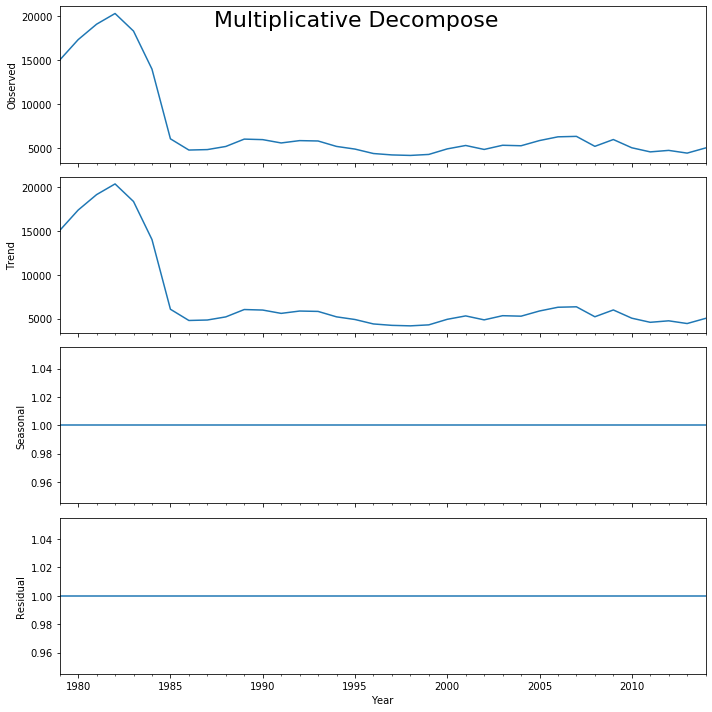

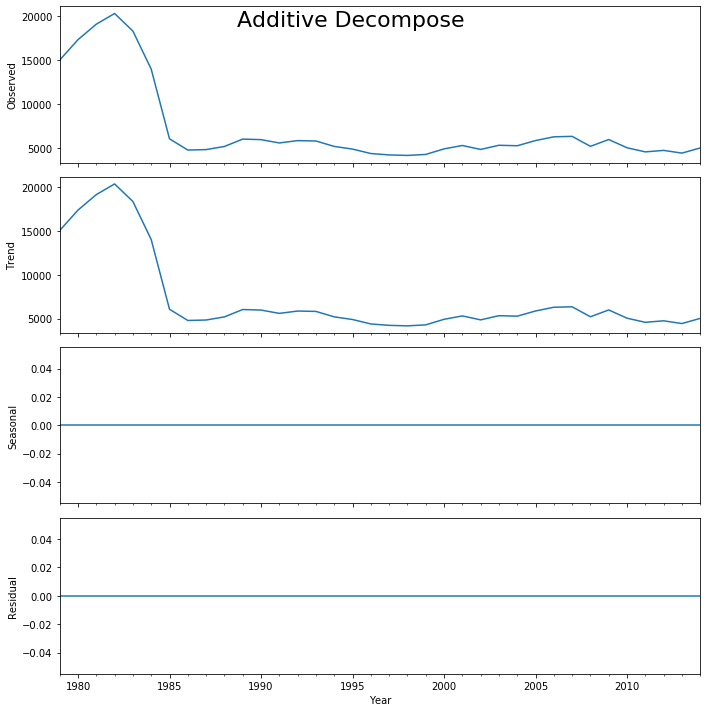

In [0]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(train1, model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(train1, model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

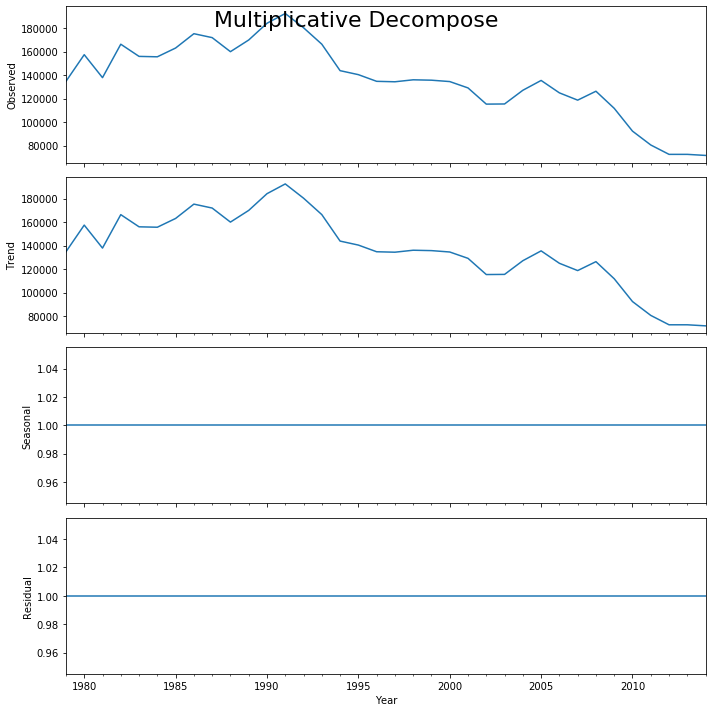

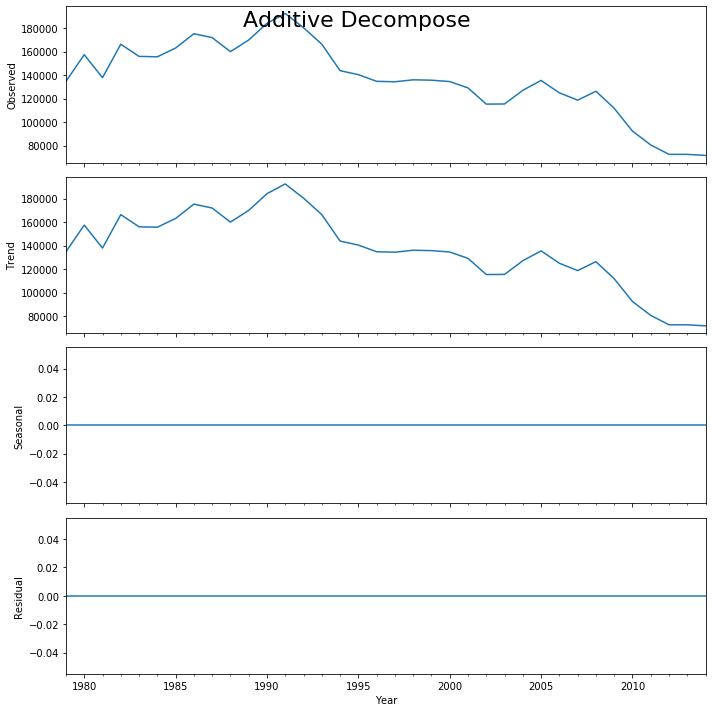

In [0]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(train2, model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(train2, model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [0]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
Year,,,,
1979-01-01,1.0,134742.0,1.0,134742.0
1980-01-01,1.0,157451.0,1.0,157451.0
1981-01-01,1.0,137878.0,1.0,137878.0
1982-01-01,1.0,166369.0,1.0,166369.0
1983-01-01,1.0,155996.0,1.0,155996.0


### ADf Hypothesis

In [0]:
test_stationarity(train1)

Augmented Dickey-Fuller Test Results:
ADF Test Statistic      -1.697182
P-Value                  0.432565
# Lags Used              0.000000
# Observations Used     35.000000
Critical Value (1%)     -3.632743
Critical Value (5%)     -2.948510
Critical Value (10%)    -2.613017
dtype: float64
Is the time series stationary? False


### Differencing

In [0]:
diff1 = train1.diff()
diff1.dropna(inplace=True)

In [0]:
sTest1 = StationarityTests()
sTest1.ADF_Stationarity_Test(diff1, printResults = True)
print("Is the time series stationary? {0}".format(sTest1.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic      -3.321077
P-Value                  0.013962
# Lags Used              0.000000
# Observations Used     34.000000
Critical Value (1%)     -3.639224
Critical Value (5%)     -2.951230
Critical Value (10%)    -2.614447
dtype: float64
Is the time series stationary? True


In [0]:
diff2 = train2.diff()
diff2.dropna(inplace=True)
#plt.plot(diff2)
#plt.show()

In [0]:
sTest2 = StationarityTests()
sTest2.ADF_Stationarity_Test(diff2, printResults = True)
print("Is the time series stationary? {0}".format(sTest2.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic      -3.484564
P-Value                  0.008392
# Lags Used              1.000000
# Observations Used     33.000000
Critical Value (1%)     -3.646135
Critical Value (5%)     -2.954127
Critical Value (10%)    -2.615968
dtype: float64
Is the time series stationary? True


In [0]:
#test_stationarity(diff2)

### ACF and PACF Plots for CS_Total

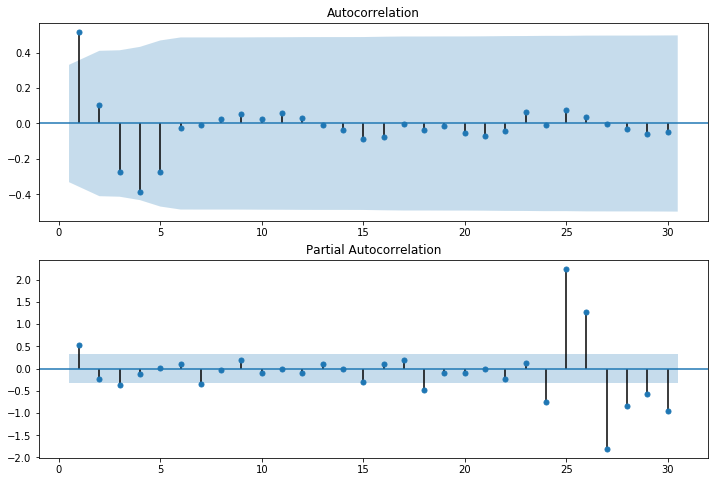

In [0]:
acf_pacf_plots(diff1)

### Time series models for CS

In [0]:
## AR
#plt.subplot(131)
model = ARIMA(train1,order=(1,1,0))
result_AR = model.fit(disp=-1)
#plt.plot(diff1)
#plt.plot(result_AR.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((result_AR.fittedvalues-diff1)**2))
print(result_AR.summary())

## MA
#plt.subplot(132)
model = ARIMA(train1,order=(0,1,6))
result_MA = model.fit(disp=-1)
#plt.plot(diff1)
#plt.plot(result_MA.fittedvalues,color='red')
#plt.title('RSS: %.4f'% sum((result_MA.fittedvalues-diff1)**2))
print(result_MA.summary())

## ARIMA
#plt.subplot(133)
model = ARIMA(train1,order=(2,1,1))
result_ARIMA = model.fit()
#plt.plot(diff1)
#plt.plot(result_MA.fittedvalues,color='red')
#plt.title('RSS: %.4f'% sum((result_MA.fittedvalues-diff1)**2))
#plt.show()
print(result_ARIMA.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



                             ARIMA Model Results                              
Dep. Variable:             D.CS_Total   No. Observations:                   35
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -304.235
Method:                       css-mle   S.D. of innovations           1434.390
Date:                Mon, 27 Jan 2020   AIC                            614.471
Time:                        14:42:34   BIC                            619.137
Sample:                    01-01-1980   HQIC                           616.082
                         - 01-01-2014                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -173.8814    517.843     -0.336      0.739   -1188.834     841.071
ar.L1.D.CS_Total     0.5438      0.144      3.770      0.001       0.261       0.826
                            

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



In [0]:
lbox = sm.stats.acorr_ljungbox(result_AR.resid, lags=25, boxpierce=True)
lbox

(array([ 0.37619951,  0.37745799,  3.3376713 ,  6.51187458,  7.94506027,
         9.29172623,  9.31175412,  9.31298294,  9.48905891,  9.53345757,
         9.71062974,  9.73313829,  9.74021947,  9.74597279, 10.07963605,
        10.37067835, 10.84356382, 11.02511409, 11.13351097, 11.21143285,
        11.54242803, 12.04470329, 14.76451135, 16.47339589, 18.08269254]),
 array([0.53964425, 0.82801087, 0.34243382, 0.16404372, 0.15928957,
        0.15782407, 0.23104153, 0.31658495, 0.39340686, 0.4823317 ,
        0.55658874, 0.63935934, 0.71502701, 0.78050994, 0.8147009 ,
        0.84656715, 0.8645797 , 0.8932879 , 0.9192657 , 0.94055398,
        0.95115556, 0.95644899, 0.9028745 , 0.87023628, 0.83886027]),
 array([ 0.34569685,  0.34681928,  2.90700376,  5.56647137,  6.72851382,
         7.78400877,  7.79916501,  7.80006172,  7.92379077,  7.95378987,
         8.06871236,  8.08270416,  8.08691459,  8.09017999,  8.27053851,
         8.41999266,  8.65004505,  8.73346004,  8.78033437,  8.81192432,

The p-value > 0.05 at sevral lags  tells us that the residuals have no autocorrelations and are seemingly random

### Predictions

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



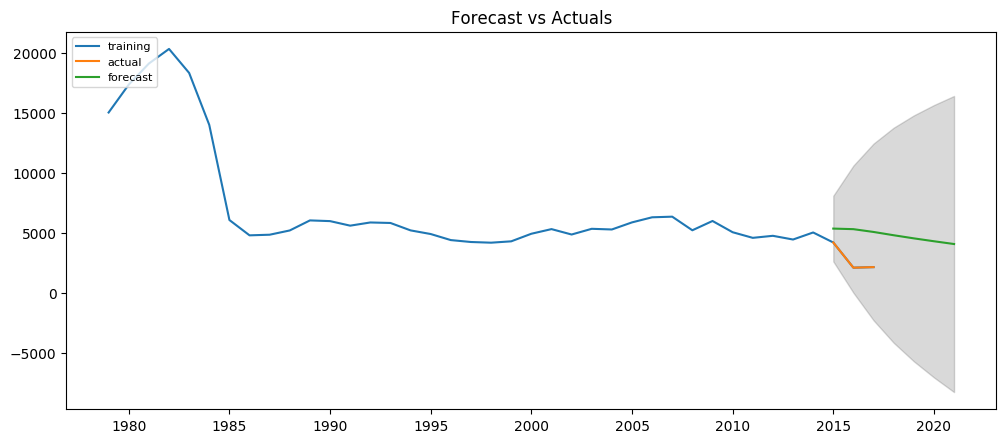

Year
2015-01-01    5349.143042
2016-01-01    5301.837872
2017-01-01    5068.374766
2018-01-01    4794.333712
2019-01-01    4534.630111
2020-01-01    4293.299236
2021-01-01    4060.892669
dtype: float64

In [0]:
model_forecast(civil_data2['CS_Total'],train1, test1, (2,1,0),7)

In [0]:
forecast_accuracy(fc_series, test1.values)

{'mae': 2435.7852267623853,
 'mape': 1.0636326554606204,
 'me': 2435.7852267623853,
 'mpe': 1.0636326554606204,
 'rmse': 2600.1872834296682}

Despite having a lower rsme, the predictions may not account for good forecast due to higher mape score

### ACF and PACF plots for SC_Total

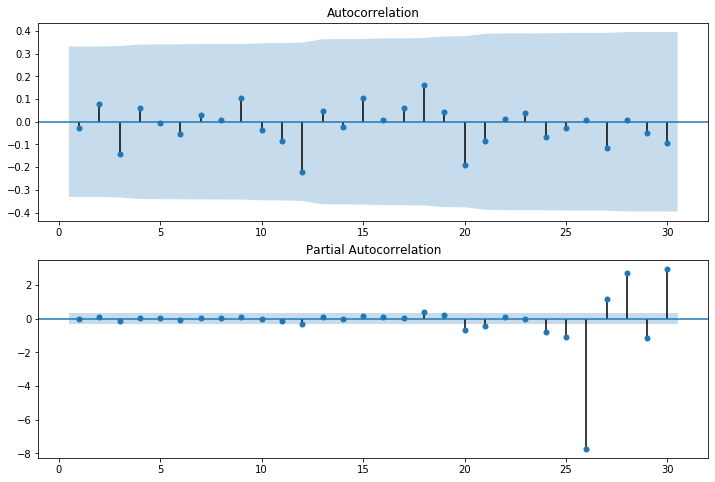

In [0]:
acf_pacf_plots(diff2)

### Time series models for SC

In [0]:
## AR
model = ARIMA(train2,order=(1,1,0))
result_AR = model.fit(disp=-1)
print(result_AR.summary())

## MA
#plt.subplot(132)
model = ARIMA(train2,order=(0,1,6))
result_MA = model.fit(disp=-1)
print(result_MA.summary())

## ARIMA
#plt.subplot(133)
model = ARIMA(train2,order=(2,1,0))
result_ARIMA = model.fit()
print(result_ARIMA.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



                             ARIMA Model Results                              
Dep. Variable:             D.SC_Total   No. Observations:                   35
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -377.404
Method:                       css-mle   S.D. of innovations          11661.234
Date:                Mon, 27 Jan 2020   AIC                            760.808
Time:                        14:42:37   BIC                            765.474
Sample:                    01-01-1980   HQIC                           762.419
                         - 01-01-2014                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1810.3897   1917.196     -0.944      0.352   -5568.025    1947.245
ar.L1.D.SC_Total    -0.0313      0.178     -0.176      0.862      -0.381       0.318
                            

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



                             ARIMA Model Results                              
Dep. Variable:             D.SC_Total   No. Observations:                   35
Model:                 ARIMA(0, 1, 6)   Log Likelihood                -373.876
Method:                       css-mle   S.D. of innovations           9858.369
Date:                Mon, 27 Jan 2020   AIC                            763.751
Time:                        14:42:39   BIC                            776.194
Sample:                    01-01-1980   HQIC                           768.047
                         - 01-01-2014                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1803.9562   1562.731     -1.154      0.258   -4866.854    1258.941
ma.L1.D.SC_Total     0.1013      0.194      0.523      0.605      -0.278       0.481
ma.L2.D.SC_Total     0.2415 

In [0]:
lbox = sm.stats.acorr_ljungbox(result_AR.resid, lags=25, boxpierce=True)
lbox

(array([1.14460650e-03, 2.08039961e-01, 9.96218737e-01, 1.13159152e+00,
        1.13304333e+00, 1.26652703e+00, 1.30252527e+00, 1.30810955e+00,
        1.83626490e+00, 1.90834913e+00, 2.35986538e+00, 5.10952816e+00,
        5.20601129e+00, 5.22557339e+00, 5.91701607e+00, 5.92799245e+00,
        6.22138940e+00, 8.28805069e+00, 8.44597743e+00, 1.16418882e+01,
        1.24026313e+01, 1.24159449e+01, 1.25707507e+01, 1.30874445e+01,
        1.31967478e+01]),
 array([0.97301109, 0.90120729, 0.80216691, 0.88922801, 0.95113738,
        0.97347132, 0.98837163, 0.99545457, 0.99380004, 0.99699553,
        0.99677899, 0.95422015, 0.97037354, 0.98241901, 0.98110818,
        0.98885482, 0.99157035, 0.97403287, 0.9815935 , 0.92785065,
        0.92810511, 0.94818391, 0.96069268, 0.96465748, 0.97399757]),
 array([1.05180057e-03, 1.85580090e-01, 8.67248220e-01, 9.80668661e-01,
        9.81845800e-01, 1.08646816e+00, 1.11371007e+00, 1.11778509e+00,
        1.48892128e+00, 1.53762684e+00, 1.83050225e+00, 

The p-value > 0.05 at sevral lags  tells us that the residuals have no autocorrelations and are seemingly random

We choose the model which has lower BIC, in this case its AR model

### Predictions

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



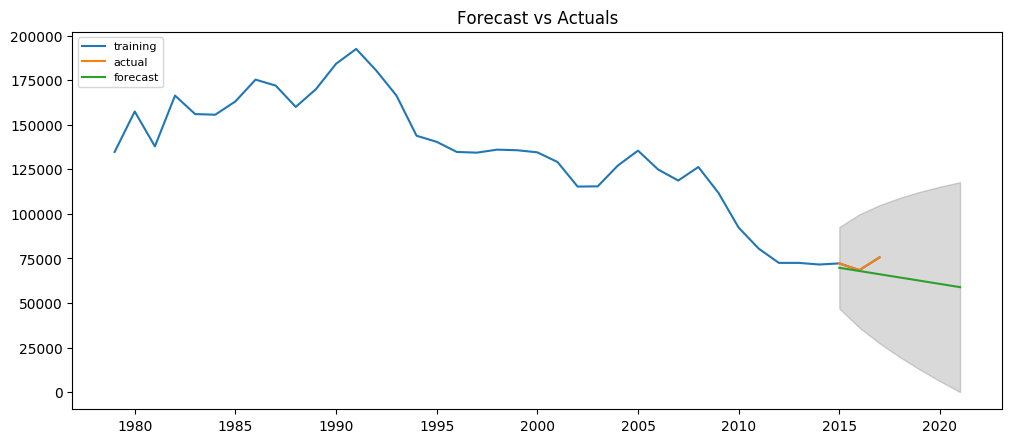

Year
2015-01-01    69766.309332
2016-01-01    67956.805231
2017-01-01    66146.387798
2018-01-01    64335.998947
2019-01-01    62525.609201
2020-01-01    60715.219483
2021-01-01    58904.829764
dtype: float64

In [0]:
model_forecast(civil_data2['SC_Total'],train2, test2, (1,1,0),7)

In [0]:
forecast_accuracy(fc_series, test2.values)

{'mae': 4135.499213060456,
 'mape': 0.05541588905425091,
 'me': -4135.499213060456,
 'mpe': -0.05541588905425091,
 'rmse': 5658.431413190992}

Around 5% MAPE implies the model is about 95% accurate in predicting the next 6 observations.

### Notes

There were 81,200 civil law cases initiated across the Court of Session and sheriff courts in 2017-18 (excluding summary applications). This represents an increase of 10% from 2016-17, and is only the second increase in court business levels over the last ten years.

Debt actions remain the most common, constituting 46% of initiated cases. Eviction and Family actions were second and third most common, at 18% and 16% respectively.

The 2017-18 Scottish Crime and Justice Survey shows that nearly three in ten adults were estimated to have experienced at least one civil law problem during the previous three years. The most common type of issues were disputes with neighbours (15%), followed by problems with faulty goods or services (5%), and money and debt issues (4%).

## Criminal Proceedings

In [0]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=cp_data1.index, y=cp_data1['Total crimes'],
                    mode='lines',
                    name='Total crimes'))
fig.update_layout(title='Time Series Plot for All Crimes',
                   xaxis_title='Year',
                   yaxis_title='Count')
fig.show()

In [0]:
# Specifying the data for time series analysis
train = cp_data1[:'2015-01-01']['Total crimes']
test = cp_data1['2016-01-01':]['Total crimes']
test

Year
2016-01-01    238921.0
2017-01-01    244504.0
2018-01-01         NaN
2019-01-01         NaN
2020-01-01         NaN
2021-01-01         NaN
Name: Total crimes, dtype: float64

### Decomposition

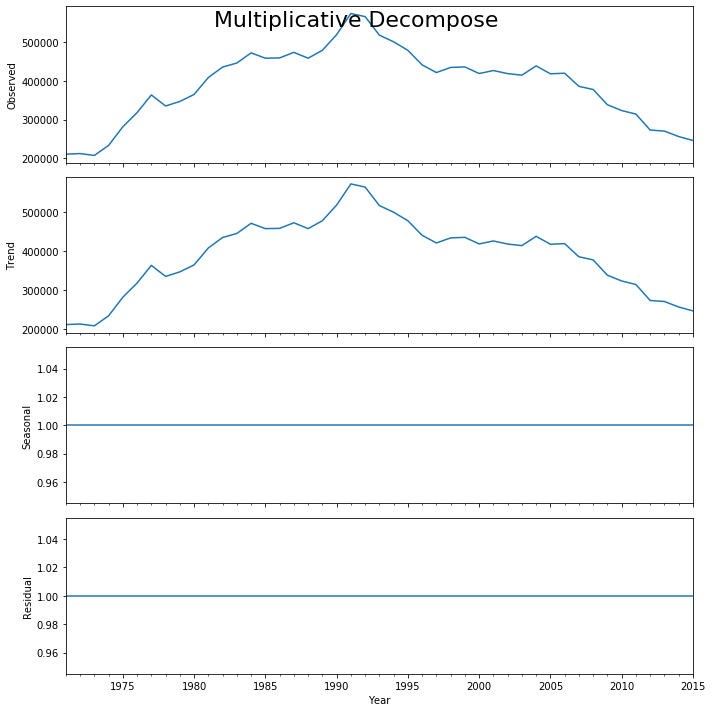

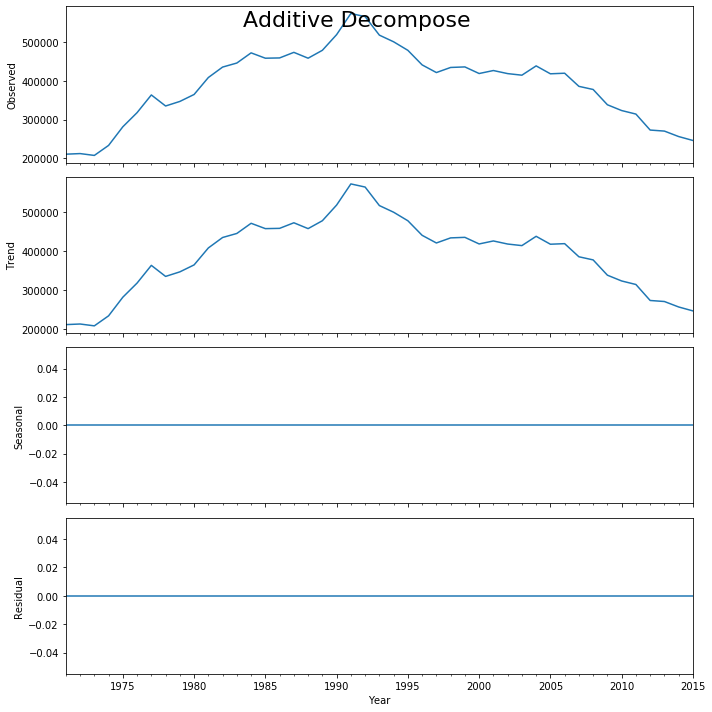

In [0]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(train, model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(train, model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [0]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
Year,,,,
1971-01-01,1.0,210966.0,1.0,210966.0
1972-01-01,1.0,212529.0,1.0,212529.0
1973-01-01,1.0,207778.0,1.0,207778.0
1974-01-01,1.0,233555.0,1.0,233555.0
1975-01-01,1.0,281485.0,1.0,281485.0


### ADf test

In [0]:
test_stationarity(train)

Augmented Dickey-Fuller Test Results:
ADF Test Statistic      -1.636815
P-Value                  0.463926
# Lags Used              1.000000
# Observations Used     43.000000
Critical Value (1%)     -3.592504
Critical Value (5%)     -2.931550
Critical Value (10%)    -2.604066
dtype: float64
Is the time series stationary? False


### Differencing

In [0]:
diff1 = train.diff()
diff1.dropna(inplace=True)

In [0]:
sTest1 = StationarityTests()
sTest1.ADF_Stationarity_Test(diff1, printResults = True)
print("Is the time series stationary? {0}".format(sTest1.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic      -4.172936
P-Value                  0.000732
# Lags Used              0.000000
# Observations Used     43.000000
Critical Value (1%)     -3.592504
Critical Value (5%)     -2.931550
Critical Value (10%)    -2.604066
dtype: float64
Is the time series stationary? True


### ACF and PACF plots for All crimes

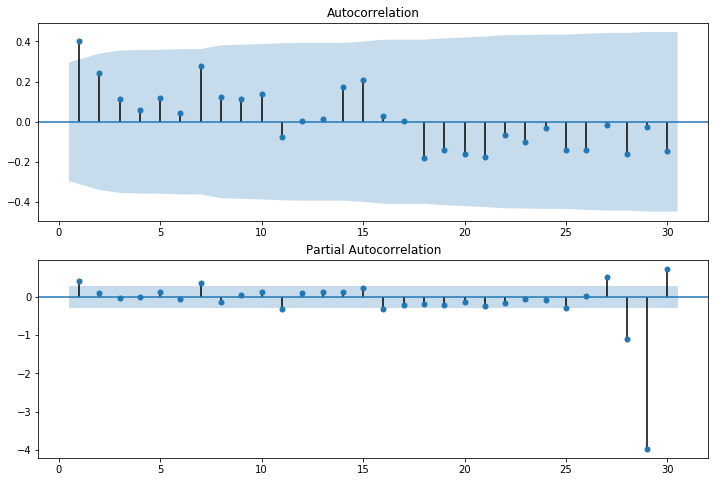

In [0]:
acf_pacf_plots(diff1)

### Time series models

In [0]:
## AR
model = ARIMA(train,order=(3,1,0))
result_AR = model.fit(disp=-1)
print(result_AR.summary())

## MA
model = ARIMA(train,order=(0,1,1))
result_MA = model.fit(disp=-1)
print(result_MA.summary())

## ARIMA
model = ARIMA(train,order=(3,1,2))
result_ARIMA = model.fit()
print(result_ARIMA.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



                             ARIMA Model Results                              
Dep. Variable:         D.Total crimes   No. Observations:                   44
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -504.564
Method:                       css-mle   S.D. of innovations          23070.522
Date:                Mon, 27 Jan 2020   AIC                           1019.129
Time:                        14:42:43   BIC                           1028.050
Sample:                    01-01-1972   HQIC                          1022.437
                         - 01-01-2015                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  419.1192   6108.910      0.069      0.946   -1.16e+04    1.24e+04
ar.L1.D.Total crimes     0.3552      0.149      2.391      0.022       0.064       0.646
ar.L2.D.Tota

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



                             ARIMA Model Results                              
Dep. Variable:         D.Total crimes   No. Observations:                   44
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -505.438
Method:                       css-mle   S.D. of innovations          23295.859
Date:                Mon, 27 Jan 2020   AIC                           1024.876
Time:                        14:42:44   BIC                           1037.365
Sample:                    01-01-1972   HQIC                          1029.508
                         - 01-01-2015                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.581e+04        nan        nan        nan         nan         nan
ar.L1.D.Total crimes     2.1222        nan        nan        nan         nan         nan
ar.L2.D.Tota

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



By looking at the BIC values we choose the MA model

In [0]:
lbox = sm.stats.acorr_ljungbox(result_MA.resid, lags=25, boxpierce=True)
lbox

(array([ 0.22314843,  2.51954148,  2.65910565,  2.66048966,  3.79920653,
         4.18324841,  9.50180921,  9.52612922,  9.76030779, 11.44552259,
        12.67915708, 12.88627542, 13.00225301, 14.35405897, 16.76163528,
        16.899518  , 17.28325688, 20.11907453, 20.4277584 , 21.30522528,
        23.34701716, 23.35524277, 24.67309691, 24.80929029, 26.41525755]),
 array([0.63665137, 0.28371906, 0.44722165, 0.6161459 , 0.5786722 ,
        0.65189339, 0.21860607, 0.29987148, 0.370236  , 0.32387648,
        0.31481167, 0.37736063, 0.44763766, 0.42368026, 0.33331245,
        0.3921279 , 0.43534074, 0.32615591, 0.36926267, 0.37936709,
        0.32575889, 0.38190829, 0.36735783, 0.41618282, 0.38571186]),
 array([ 0.20859528,  2.30530197,  2.42969612,  2.43089961,  3.39633347,
         3.71358546,  7.99155828,  8.01059133,  8.18877068,  9.43436423,
        10.31936288, 10.46344521, 10.54160402, 11.4232166 , 12.94103645,
        13.02496506, 13.2502031 , 14.85305655, 15.02081953, 15.47862833,

The p-value > 0.05 at sevral lags  tells us that the residuals have no autocorrelations and are seemingly random

In [0]:
# Actual vs Fitted
#result_MA.plot_predict(dynamic=False)
#plt.show()

### Predictions

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



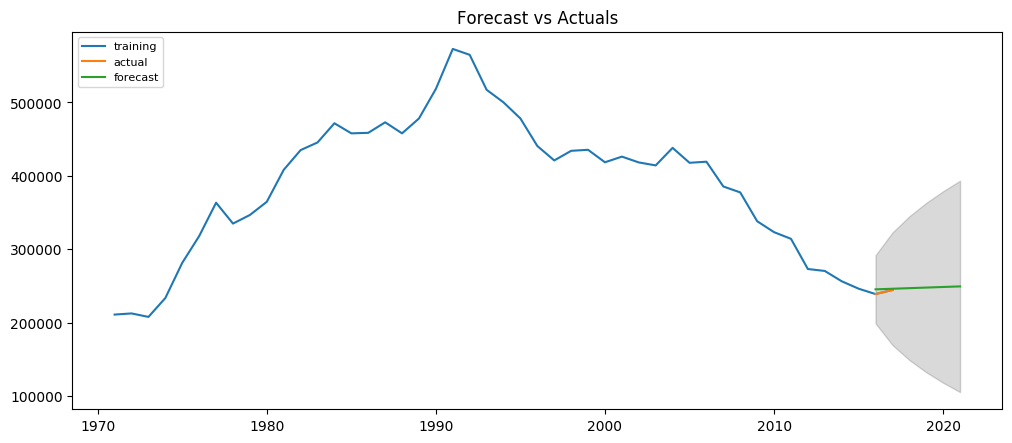

Year
2016-01-01    245354.809346
2017-01-01    246156.559346
2018-01-01    246958.309346
2019-01-01    247760.059346
2020-01-01    248561.809346
2021-01-01    249363.559346
dtype: float64

In [0]:
model_forecast(cp_data1['Total crimes'],train, test, (0,1,1),6)

In [0]:
forecast_accuracy(fc_series, test.values)

{'mae': 4043.1843462797406,
 'mape': 0.016843714411359376,
 'me': 4043.1843462797406,
 'mpe': 0.016843714411359376,
 'rmse': 4697.065844612627}

Around 1.6% MAPE implies the model is about 97.8% accurate in predicting the next 6 observations.

In statistics, the mean percentage error (MPE) is the computed average of percentage errors by which forecasts of a model differ from actual values of the quantity being forecast.

The formula for the mean percentage error is:

MPE = 100 % n ∑ t = 1 n (a t − f t /a t )

where at is the actual value of the quantity being forecast, ft is the forecast, and n is the number of different times for which the variable is forecast.

Because actual rather than absolute values of the forecast errors are used in the formula, positive and negative forecast errors can offset each other; as a result the formula can be used as a measure of the bias in the forecasts.

A disadvantage of this measure is that it is undefined whenever a single actual value is zero. 

### Notes

The Recorded Crime in Scotland bulletin for 2018 - 2019 stated that overall crime rose by 1% to just under a quarter of a million offences.

The number of crimes reported was 246,480.

The report said the recording of crime remained at one of the lowest levels seen since 1974 and the police clear-up rate rose to 51%, one of the highest levels since comparable records began in 1976.

## FireArm Offence 

In [0]:
train = fa_data1[:'2013-01-01']['Total']
test = fa_data1['2014-01-01':]['Total']
test

Year
2014-01-01    358.0
2015-01-01    332.0
2016-01-01      NaN
2017-01-01      NaN
2018-01-01      NaN
2019-01-01      NaN
2020-01-01      NaN
2021-01-01      NaN
Name: Total, dtype: float64

In [0]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=fa_data1.index, y=fa_data1['Total'],
                    mode='lines',
                    name='Total crimes'))
fig.update_layout(title='Time Series Plot for FireArm offences',
                   xaxis_title='Year',
                   yaxis_title='Count')
fig.show()

### Decomposition

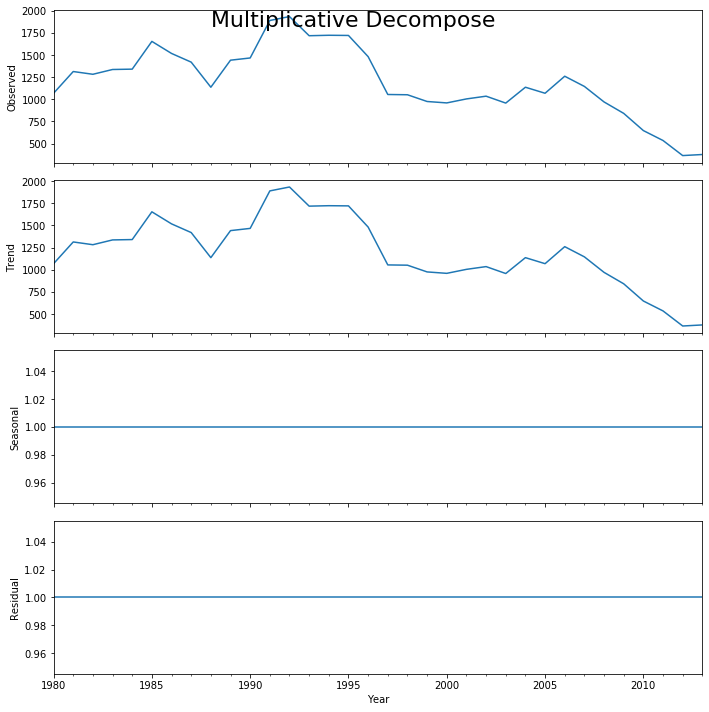

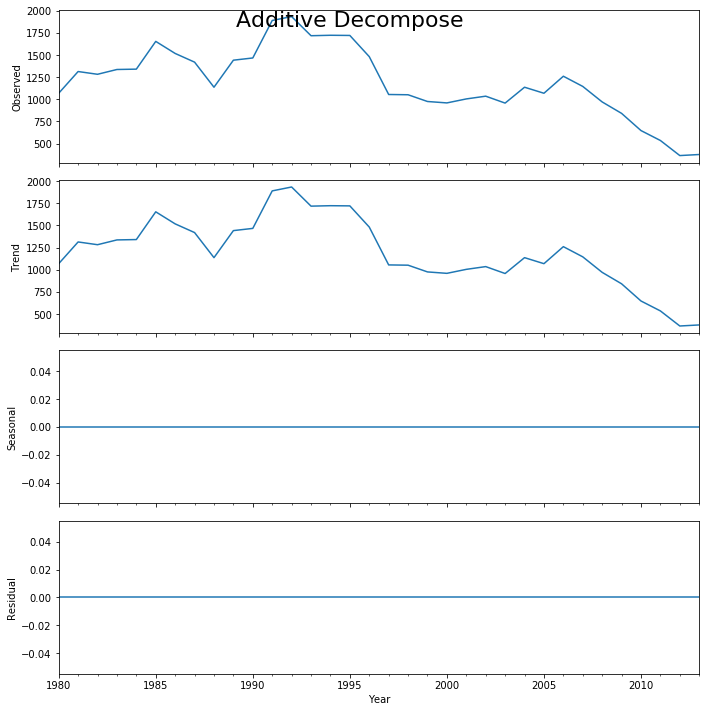

In [0]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(train, model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(train, model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [0]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
Year,,,,
1980-01-01,1.0,1068.0,1.0,1068.0
1981-01-01,1.0,1313.0,1.0,1313.0
1982-01-01,1.0,1282.0,1.0,1282.0
1983-01-01,1.0,1336.0,1.0,1336.0
1984-01-01,1.0,1340.0,1.0,1340.0


### ADf test

In [0]:
test_stationarity(train)

Augmented Dickey-Fuller Test Results:
ADF Test Statistic      -0.476078
P-Value                  0.896601
# Lags Used              0.000000
# Observations Used     33.000000
Critical Value (1%)     -3.646135
Critical Value (5%)     -2.954127
Critical Value (10%)    -2.615968
dtype: float64
Is the time series stationary? False


### Differencing

In [0]:
diff1 = train.diff()
diff1.dropna(inplace=True)

sTest1 = StationarityTests()
sTest1.ADF_Stationarity_Test(diff1, printResults = True)
print("Is the time series stationary? {0}".format(sTest1.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic      -5.365698
P-Value                  0.000004
# Lags Used              0.000000
# Observations Used     32.000000
Critical Value (1%)     -3.653520
Critical Value (5%)     -2.957219
Critical Value (10%)    -2.617588
dtype: float64
Is the time series stationary? True


### ACF and PACF plots for all firearm offences

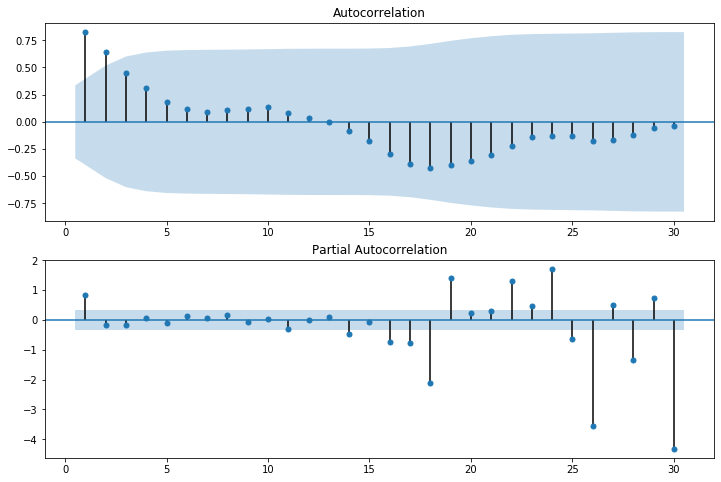

In [0]:
acf_pacf_plots(train)

### Time series models

In [0]:
## AR
model = ARIMA(train,order=(3,1,0))
result_AR = model.fit(disp=-1)
print(result_AR.summary())

## MA
model = ARIMA(train,order=(0,1,11))
result_MA = model.fit(disp=-1)
print(result_MA.summary())

## ARIMA
model = ARIMA(train,order=(3,1,2))
result_ARIMA = model.fit()
print(result_ARIMA.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



                             ARIMA Model Results                              
Dep. Variable:                D.Total   No. Observations:                   33
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -216.701
Method:                       css-mle   S.D. of innovations            171.596
Date:                Mon, 27 Jan 2020   AIC                            443.402
Time:                        14:42:48   BIC                            450.885
Sample:                    01-01-1981   HQIC                           445.920
                         - 01-01-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -20.2131     31.642     -0.639      0.528     -82.230      41.804
ar.L1.D.Total     0.0790      0.173      0.458      0.651      -0.259       0.417
ar.L2.D.Total     0.1671      0.170     

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



                             ARIMA Model Results                              
Dep. Variable:                D.Total   No. Observations:                   33
Model:                ARIMA(0, 1, 11)   Log Likelihood                -211.862
Method:                       css-mle   S.D. of innovations            120.438
Date:                Mon, 27 Jan 2020   AIC                            449.724
Time:                        14:42:57   BIC                            469.179
Sample:                    01-01-1981   HQIC                           456.270
                         - 01-01-2013                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -26.7388     11.298     -2.367      0.028     -48.883      -4.594
ma.L1.D.Total      0.1087      0.317      0.343      0.735      -0.512       0.730
ma.L2.D.Total      0.1076      1.491

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



                             ARIMA Model Results                              
Dep. Variable:                D.Total   No. Observations:                   33
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -215.784
Method:                       css-mle   S.D. of innovations            162.595
Date:                Mon, 27 Jan 2020   AIC                            445.567
Time:                        14:43:00   BIC                            456.043
Sample:                    01-01-1981   HQIC                           449.092
                         - 01-01-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -22.9705     13.491     -1.703      0.100     -49.413       3.472
ar.L1.D.Total     0.3957      0.299      1.324      0.196      -0.190       0.981
ar.L2.D.Total     0.6631      0.251     

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



It can be observed from BIC values that AR model seems to have a lower score

In [0]:
lbox = sm.stats.acorr_ljungbox(result_AR.resid, lags=25, boxpierce=True)
lbox

(array([ 0.01535293,  0.10001722,  0.10094789,  0.47278116,  1.42751715,
         1.54870838,  2.21732436,  3.43131853,  3.66689308,  5.54013706,
         5.57401427,  6.06744645,  6.62319077,  6.74232862,  8.25723132,
         9.87993407,  9.96831628, 11.2035517 , 11.43646298, 11.53513678,
        11.53936843, 11.54267781, 11.55104798, 11.5984913 , 11.61914621]),
 array([0.90138897, 0.95122124, 0.99172343, 0.97609607, 0.92127969,
        0.95619362, 0.94683939, 0.90445416, 0.93193877, 0.85230742,
        0.90022362, 0.91264398, 0.9205125 , 0.9441888 , 0.91305622,
        0.87282273, 0.90493369, 0.88551995, 0.90828255, 0.93114788,
        0.95122729, 0.96611811, 0.97682958, 0.98406443, 0.98937525]),
 array([0.01403696, 0.08902533, 0.08982305, 0.39791348, 1.16170227,
        1.25519265, 1.7518788 , 2.6190175 , 2.78055433, 4.01154323,
        4.03283748, 4.32889678, 4.64646497, 4.7111398 , 5.49023262,
        6.27840253, 6.31880582, 6.84819243, 6.94135694, 6.97800721,
        6.97945806,

The p-value > 0.05 at sevral lags  tells us that the residuals have no autocorrelations and are seemingly random

### Predictions

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



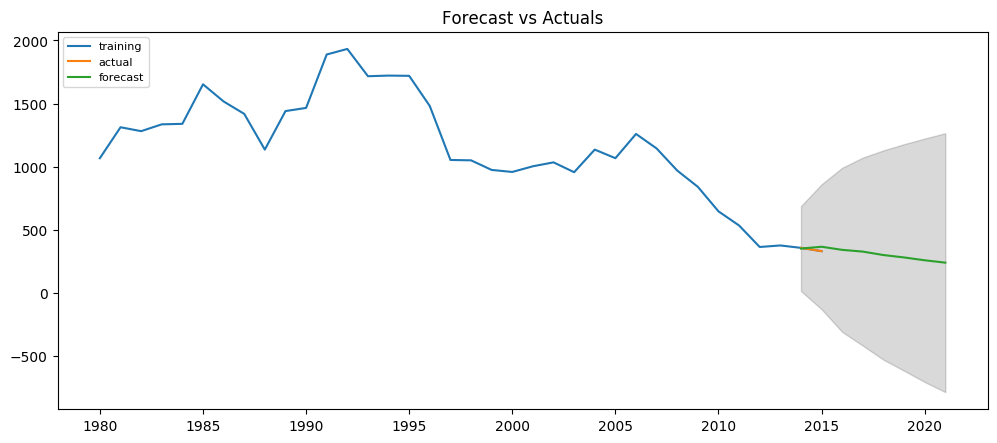

Year
2014-01-01    352.423028
2015-01-01    366.811220
2016-01-01    342.243162
2017-01-01    328.328160
2018-01-01    301.055409
2019-01-01    282.196662
2020-01-01    259.668045
2021-01-01    240.891813
dtype: float64

In [0]:
model_forecast(fa_data1['Total'],train, test, (3,1,0),8)

In [0]:
forecast_accuracy(fc_series, test.values)

{'mae': 20.194095951003135,
 'mape': 0.06021560308738239,
 'me': 14.617124419833885,
 'mpe': 0.04463747031875321,
 'rmse': 24.929136318437212}

The mape score is about 6% the confidence of the forecast is around 95%

### Notes

Official figures show that there were 348 offences in 2017-18 - the lowest since current records began in 1980.

This was a fall of 1% (two offences) from the previous year.

Offences in which a firearm caused fatal or non-fatal injuries fell by two to 41 in 2017-18. Air weapons were used in 36% of all incidents, followed by pistol/revolver (11%) and shotgun (7%).

The most commonly committed offences involving a firearm in 2017-18 were possession of a firearm with intent to endanger life or commit crime (18%), breach of the peace (17%) and common assault (14%).

The number of offences in which a firearm was discharged and caused fatal or non-fatal injury decreased by two (5%) from 43 in 2016-17 to 41 in 2017-18.

## Homicide

In [0]:
train = ho_data1[:'2013-01-01']['Homicide Cases']
test = ho_data1['2014-01-01':]['Homicide Cases']
test

Date
2014-01-01    62.0
2015-01-01    59.0
2016-01-01    62.0
2017-01-01    59.0
2018-01-01     NaN
2019-01-01     NaN
2020-01-01     NaN
2021-01-01     NaN
Name: Homicide Cases, dtype: float64

In [0]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=ho_data1.index, y=ho_data1['Homicide Cases'],
                    mode='lines',
                    name='Total crimes'))
fig.update_layout(title='Time Series Plot for Homicide Cases',
                   xaxis_title='Year',
                   yaxis_title='Count')
fig.show()

### Decomposition

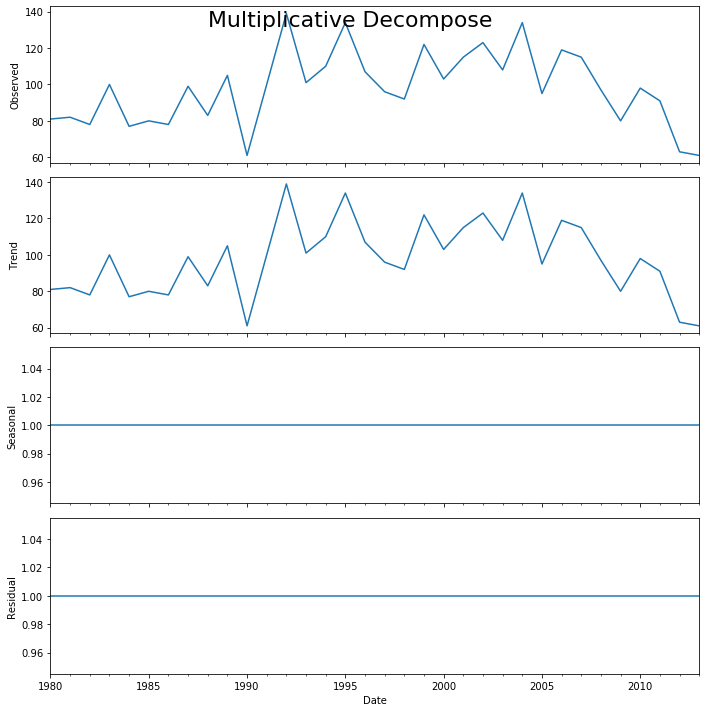

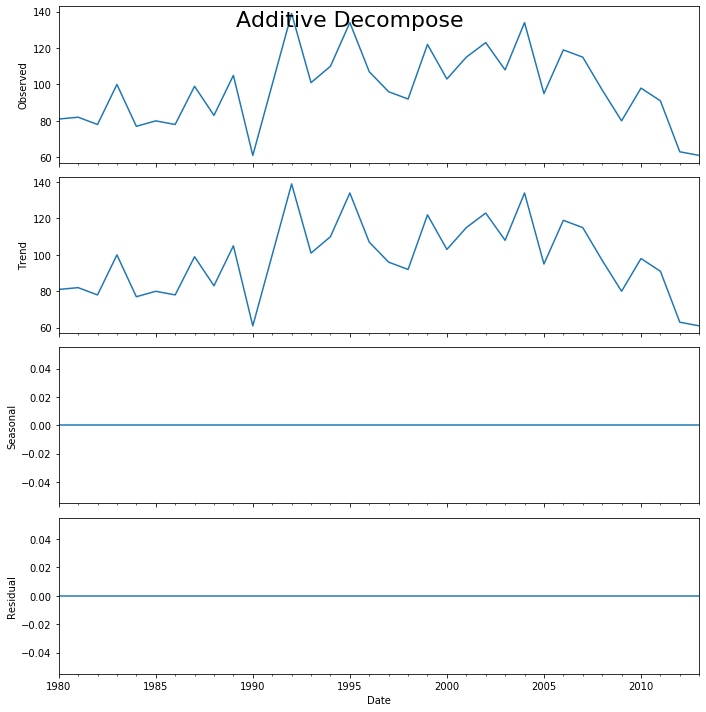

In [0]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(train, model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(train, model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

### ADf

In [0]:
test_stationarity(train)

Augmented Dickey-Fuller Test Results:
ADF Test Statistic      -3.573779
P-Value                  0.006283
# Lags Used              0.000000
# Observations Used     33.000000
Critical Value (1%)     -3.646135
Critical Value (5%)     -2.954127
Critical Value (10%)    -2.615968
dtype: float64
Is the time series stationary? True


### Differencing

In [0]:
diff1 = train.diff()
diff1.dropna(inplace=True)

sTest1 = StationarityTests()
sTest1.ADF_Stationarity_Test(diff1, printResults = True)
print("Is the time series stationary? {0}".format(sTest1.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic     -6.924973e+00
P-Value                 1.121377e-09
# Lags Used             1.000000e+00
# Observations Used     3.100000e+01
Critical Value (1%)    -3.661429e+00
Critical Value (5%)    -2.960525e+00
Critical Value (10%)   -2.619319e+00
dtype: float64
Is the time series stationary? True


### ACF and PACF plots for all firearm offences

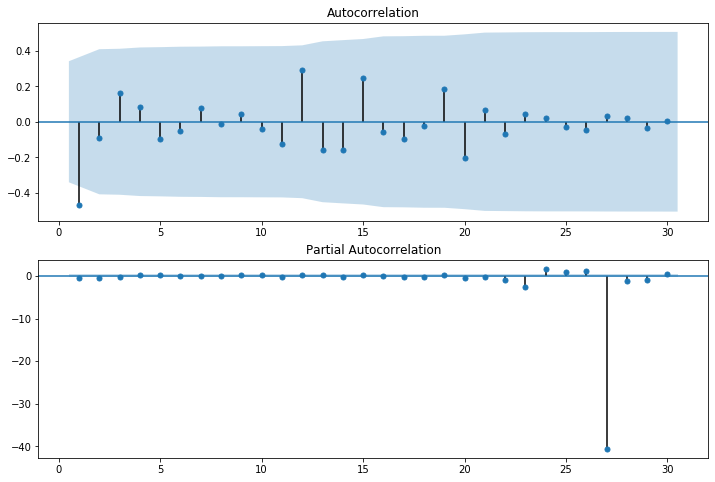

In [0]:
acf_pacf_plots(diff1)

### Time series models

In [0]:
## AR
model = ARIMA(train,order=(1,1,0))
result_AR = model.fit(disp=-1)
print(result_AR.summary())

## MA
model = ARIMA(train,order=(0,1,1))
result_MA = model.fit(disp=-1)
print(result_MA.summary())

## ARIMA
#model = ARIMA(train,order=(1,1,1))
#result_ARIMA = model.fit()
#print(result_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:       D.Homicide Cases   No. Observations:                   33
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -145.329
Method:                       css-mle   S.D. of innovations             19.717
Date:                Mon, 27 Jan 2020   AIC                            296.659
Time:                        14:43:04   BIC                            301.148
Sample:                    01-01-1981   HQIC                           298.169
                         - 01-01-2013                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.6081      2.383     -0.255      0.800      -5.279       4.063
ar.L1.D.Homicide Cases    -0.4540      0.151     -3.015      0.005      -0.749      -0.159
    

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



BIC value for the AR model is the lowest

In [0]:
lbox = sm.stats.acorr_ljungbox(result_AR.resid, lags=25, boxpierce=True)
lbox

(array([ 1.37079997,  5.23978516,  7.49071071,  8.55426373,  9.25916732,
         9.6029491 ,  9.92262455, 10.07036384, 10.14395685, 10.75927325,
        10.88538432, 15.3701884 , 17.06968714, 19.36911018, 23.63269497,
        23.63461953, 26.56819899, 26.57820635, 28.42446079, 31.12555381,
        31.50669914, 31.71943037, 31.88548245, 32.07386648, 32.55879949]),
 array([0.24167449, 0.07281068, 0.05779761, 0.07325937, 0.09916276,
        0.14239948, 0.19300084, 0.260122  , 0.33895736, 0.3765779 ,
        0.45291486, 0.22181341, 0.19613794, 0.15131921, 0.0715993 ,
        0.09779409, 0.06471208, 0.08725377, 0.07559354, 0.05355461,
        0.06562878, 0.08230682, 0.10254852, 0.12517145, 0.14247145]),
 array([ 1.25330283,  4.68011828,  6.60948304,  7.49071269,  8.05463556,
         8.31983865,  8.55731184,  8.6628399 ,  8.71330368,  9.11765445,
         9.19692427, 11.88780672, 12.85894886, 14.10720708, 16.29990783,
        16.30084261, 17.64190751, 17.64619638, 18.38469816, 19.38796128,

The p-value > 0.05 at sevral lags  tells us that the residuals have no autocorrelations and are seemingly random

### Predictions


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



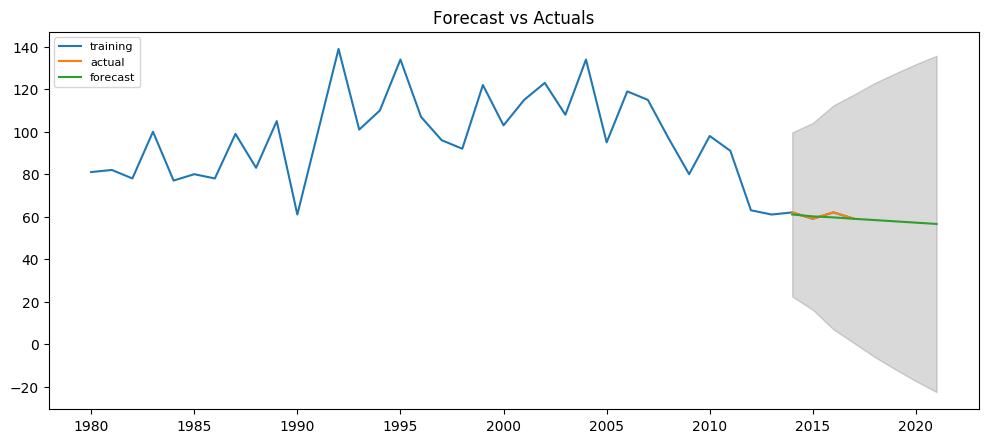

Date
2014-01-01    61.023884
2015-01-01    60.128841
2016-01-01    59.651029
2017-01-01    58.983776
2018-01-01    58.402537
2019-01-01    57.782245
2020-01-01    57.179684
2021-01-01    56.569073
dtype: float64

In [0]:
model_forecast(ho_data1['Homicide Cases'],train, test, (1,1,0),8)

In [0]:
forecast_accuracy(fc_series, test.values)

{'mae': 1.1175379673256955,
 'mape': 0.018259578604428704,
 'me': -0.5531176459642495,
 'mpe': -0.008693132479658432,
 'rmse': 1.3914932000355538}

### Notes

Between 2017-18 and 2018-19, the number of homicide cases recorded by the police in Scotland increased by 2% (or one case) from 59 to 60. This is the third lowest number of recorded homicide cases for a single twelve month period since 1976, after 59 cases were recorded in each of 2015-16 and 2017-18.

The number of homicide cases in Scotland has remained relatively stable in recent years, with between 59 and 63 cases recorded each year since 2012-13.

Over the ten year period from 2009-10 to 2018-19, the number of homicide cases in Scotland fell by 25% (20 cases) from 80 to 60. Glasgow City accounted for over a third (35%) of this decrease. In 2018-19, over one fifth (13) of the 60 national recorded homicide cases occurred within Glasgow City.

In 2018-19, 61 victims of homicide were recorded, 3% (two victims) more than the 59 victims recorded in 2017-18. Of the 61 victims, 75% (46) were male.

In 2018-19, 83 persons were accused of homicide and 88% (73) of them were male. Of the 60 cases of homicide recorded for 2018-19, 57 were solved and three are currently unsolved.

For each of the last ten years, the most common method of killing was with a sharp instrument. In 2018-19, a sharp instrument was the main method of killing for 44% (27) of homicide victims.


# K-means Clustering

In [0]:
def elbow(df,c):

  cols = c
  X = df[cols].values

  Error =[]
  for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)
  plt.plot(range(1, 11), Error)
  plt.title('Elbow method')
  plt.xlabel('No of clusters')
  plt.ylabel('Error')
  plt.show()

In [0]:
def k_means(df,c,n):
  cols = c
  d = df[cols].values

  kmeans = KMeans(n_jobs = -1, n_clusters = n, init='k-means++')
  kmeans.fit(d)
  pred = kmeans.predict(d)

  # add clustering labels
  df.insert(0,'Cluster Labels', kmeans.labels_)

  plt.scatter(d[:,1], d[:,2])
  plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red')
  plt.show()

k-means is limited to linear cluster boundaries

The fundamental model assumptions of k-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries.

In particular, the boundaries between k-means clusters will always be linear, which means that it will fail for more complicated boundaries.

In [0]:
def spectral(df, c,n):
  X = df[c].values
  model = SpectralClustering(n_clusters=n, affinity='nearest_neighbors',assign_labels='kmeans')
  labels = model.fit_predict(X)

  # add clustering labels
  df.insert(0,'Spectral Cluster Labels', model.labels_)

  plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis')

Difference between K Means and Hierarchical clustering

Hierarchical clustering can’t handle big data well but K Means clustering can. This is because the time complexity of K Means is linear i.e. O(n) while that of hierarchical clustering is quadratic i.e. O(n2).

In K Means clustering, since we start with random choice of clusters, the results produced by running the algorithm multiple times might differ. While results are reproducible in Hierarchical clustering.

K Means is found to work well when the shape of the clusters is hyper spherical (like circle in 2D, sphere in 3D).

K Means clustering requires prior knowledge of K i.e. no. of clusters you want to divide your data into. But, you can stop at whatever number of clusters you find appropriate in hierarchical clustering by interpreting the dendrogram


In [0]:
def algo_cluster(df,n):
  cluster = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='ward') 
  cluster.fit_predict(df)

  # add clustering labels
  df.insert(0,'Algo Cluster Labels', cluster.labels_)

  plt.figure(figsize=(10, 7))  
  plt.scatter(df.iloc[:,0].values, df.iloc[:,1].values, c=cluster.labels_) 

## Criminal Justice based on council areas

In [0]:
#cj_data6.columns.to_list()

In [0]:
colms = ['Criminal justice social work reports submitted_Proportion per 10,000 population1',
         'Community payback orders imposed_Proportion per 10,000 population1',
         'Drug treatment & testing orders imposed_Proportion per 10,000 population1',
         'Diversion from prosecution cases commenced_Proportion per 10,000 population1,2']

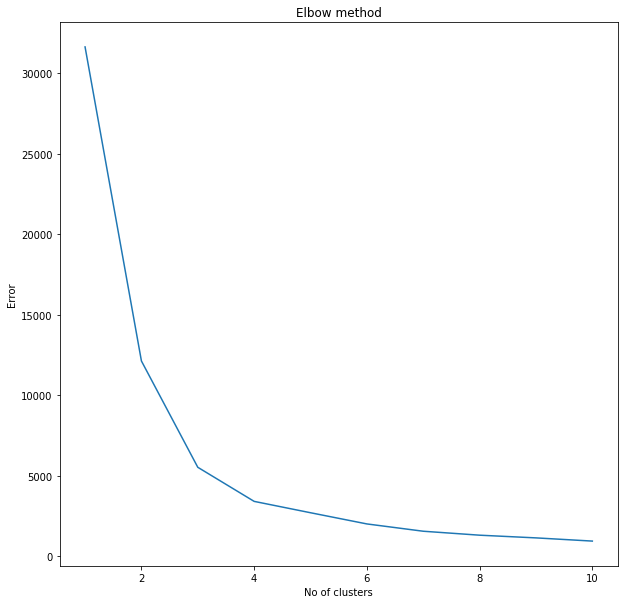

In [0]:
elbow(cj_data6,colms)

As you can see, the optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3 in the above graph.

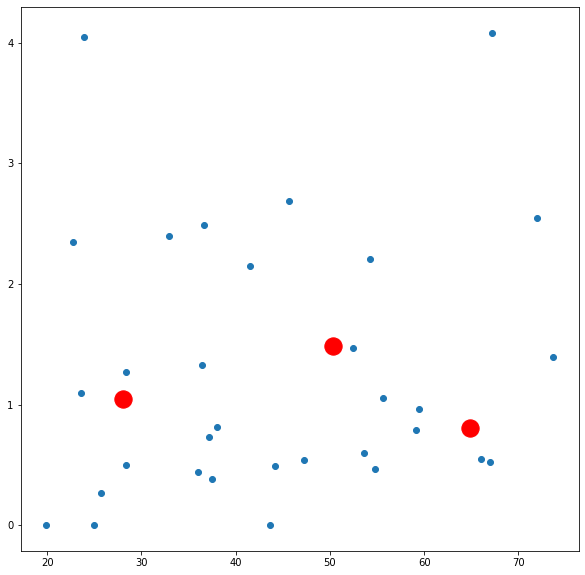

In [0]:
k_means(cj_data6,colms,3)

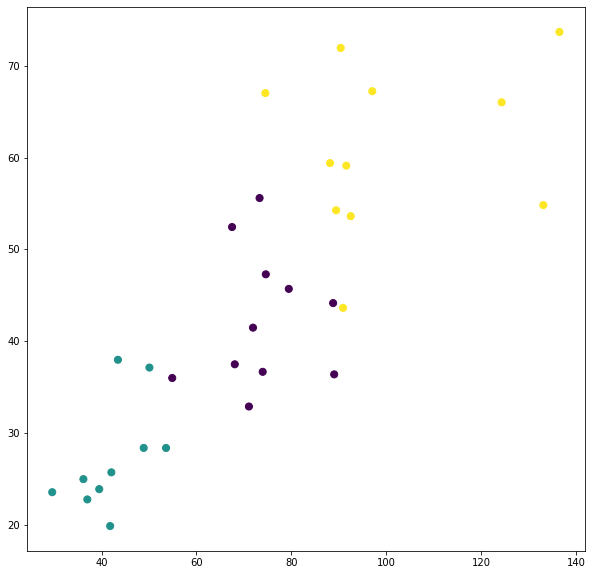

In [0]:
spectral(cj_data6,colms,3)

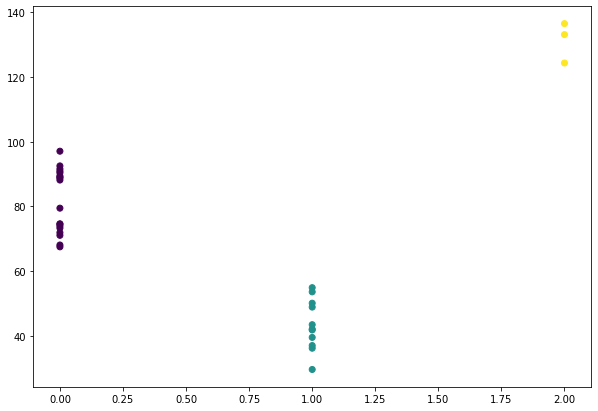

In [0]:
algo_cluster(cj_data6[colms],3)

In [0]:
# Adding clustering markers to the map
fig = px.scatter_mapbox(cj_data6, lat= 'Latitude', lon = 'Longitude', color = 'Cluster Labels', labels = 'Local authority area',text='Local authority area',
                        hover_data=['Cluster Labels'],
                        color_discrete_sequence= px.colors.sequential.Viridis, 
                        height=450, zoom= 4.25)
fig.update_traces(textposition='top center')
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Results of clustering

In [0]:
demo_data2.head()

,Places,Latitude,Longitude,NoofPlaces,Scottish only,Scottish and British only,British only,Other UK identities,Scottish and any other identities,Other only,Population,Electors,Area (km²),Density(per km²),Population-2001,Population-2011,% change(2001–11)
0,Aberdeen City,57.149651,-2.099075,40,0.547,0.177,0.083,0.047,0.025,0.121,227560,163196,185.7,1225,212125,222800,5
1,Aberdeenshire,NaN,NaN,299,0.613,0.177,0.090,0.067,0.019,0.036,261470,202194,6313.0,41,226871,253000,11.5
2,Angus,NaN,NaN,148,0.668,0.178,0.072,0.044,0.016,0.022,116040,89652,2182.0,53,108400,116000,7
3,Argyll & Bute,NaN,NaN,253,0.574,0.172,0.116,0.089,0.024,0.024,86260,68271,6909.0,12,91306,88200,−3.4
4,Clackmannanshire,NaN,NaN,19,0.670,0.176,0.074,0.043,0.016,0.021,51400,39186,159.0,323,48077,51400,7


In [0]:
merge1 = cj_data6.merge(demo_data2,left_on='Local authority area',right_on='Places',how='inner')

In [0]:
merge1.drop(columns=['Latitude_x','Longitude_x'],axis=1).groupby(['Cluster Labels']).mean()

,Spectral Cluster Labels,Criminal justice social work reports submitted_Number,"Criminal justice social work reports submitted_Proportion per 10,000 population1",Community payback orders imposed_Number,"Community payback orders imposed_Proportion per 10,000 population1",Drug treatment & testing orders imposed_Number,"Drug treatment & testing orders imposed_Proportion per 10,000 population1",Diversion from prosecution cases commenced_Number2,"Diversion from prosecution cases commenced_Proportion per 10,000 population1,2",Latitude_y,Longitude_y,NoofPlaces,Scottish only,Scottish and British only,British only,Other UK identities,Scottish and any other identities,Other only,Population,Electors,Area (km²),Density(per km²),Population-2001,Population-2011
Cluster Labels,,,,,,,,,,,,,,,,,,,,,,,,
0,2.000000,1019.333333,131.321674,487.666667,64.839936,6.333333,0.804309,40.000000,4.609257,NaN,NaN,91.666667,0.677000,0.176333,0.065333,0.036000,0.015333,0.030333,107330.000000,82118.666667,493.610000,968.666667,104658.333333,107133.333333
1,0.909091,469.545455,43.358891,311.090909,28.061562,20.000000,1.048043,49.181818,3.435200,NaN,NaN,93.000000,0.588364,0.186636,0.099364,0.063364,0.022091,0.040091,151789.090909,114593.818182,4648.827273,313.818182,136552.727273,145309.090909
2,0.888889,1121.111111,81.793981,719.388889,50.351145,18.555556,1.482747,61.444444,5.003514,57.149651,-2.099075,122.833333,0.652611,0.182333,0.078000,0.042778,0.016167,0.028056,191468.333333,145236.222222,1405.294444,564.166667,180330.888889,187538.888889


## Homicide by council areas

In [0]:
ho_data2.columns

Index(['Local Authority', '2017-18', '2016-17', 'Latitude', 'Longitude'], dtype='object')

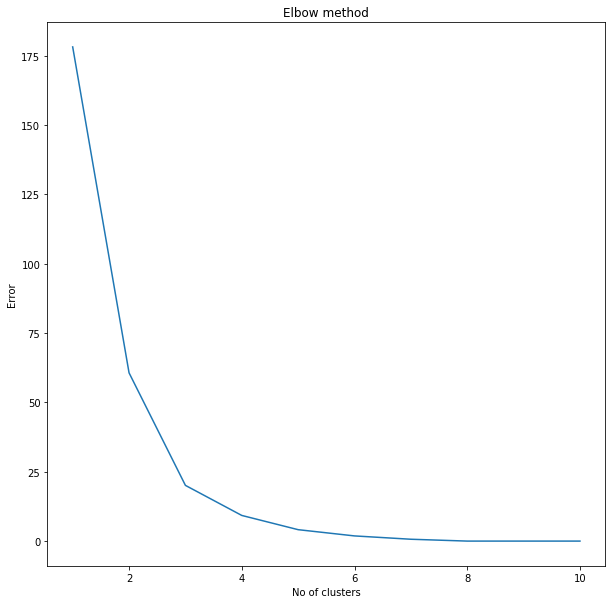

In [0]:
elbow(ho_data2,['2017-18'])

In [0]:
  cols = ['2017-18','2016-17']
  d = ho_data2[cols].values

  kmeans = KMeans(n_jobs = -1, n_clusters = 3, init='k-means++')
  kmeans.fit(d)
  pred = kmeans.predict(d)

  # add clustering labels
  ho_data2.insert(0,'Cluster Labels', kmeans.labels_)

In [0]:
# Adding clustering markers to the map
fig = px.scatter_mapbox(ho_data2, lat= 'Latitude', lon = 'Longitude', color = 'Cluster Labels', labels = 'Local Authority',text='Local Authority',
                        hover_data=['Cluster Labels'],
                        color_discrete_sequence= px.colors.sequential.Viridis, 
                        height=450, zoom= 4.25)
fig.update_traces(textposition='top center')
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Results of clustering

In [0]:
merge2 = ho_data2.merge(demo_data2,left_on='Local Authority',right_on='Places',how='inner')

In [0]:
# homicide cases by local authority or council areas
merge2.drop(columns=['Latitude_x','Longitude_x'],axis=1).groupby(['Cluster Labels']).mean()

,2017-18,2016-17,Latitude_y,Longitude_y,NoofPlaces,Scottish only,Scottish and British only,British only,Other UK identities,Scottish and any other identities,Other only,Population,Electors,Area (km²),Density(per km²),Population-2001,Population-2011
Cluster Labels,,,,,,,,,,,,,,,,,
0,11.000000,12.000000,NaN,NaN,208.000000,0.638000,0.182000,0.079000,0.051000,0.018000,0.032000,626410.000000,462286.000000,174.700000,3586.000000,577869.000000,593200.000000
1,0.714286,1.047619,NaN,NaN,92.619048,0.633190,0.183476,0.086381,0.052095,0.018143,0.026524,119602.857143,92572.142857,3325.142857,220.380952,111452.619048,117690.476190
2,3.833333,3.166667,57.149651,-2.099075,165.833333,0.648167,0.187000,0.074833,0.034667,0.016500,0.039167,252435.000000,190350.500000,695.766667,596.166667,240317.833333,249333.333333


## Reconviction

In [0]:
colms = ['Number of offenders', 'Reconviction rate',
       'Average number of reconvictions per offender']

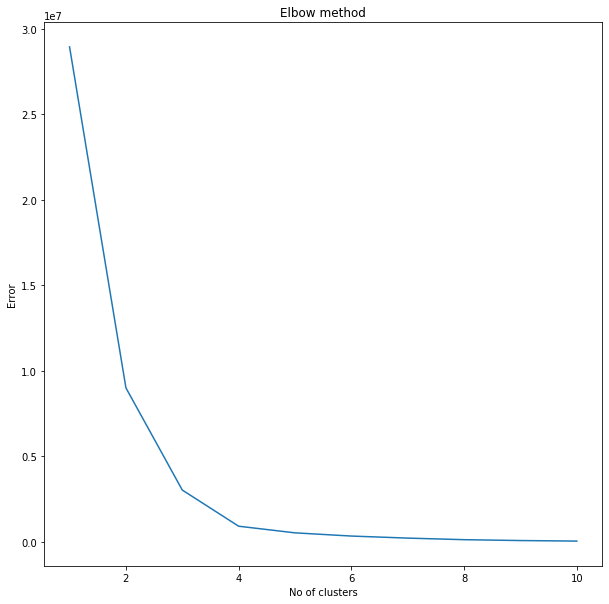

In [0]:
elbow(re_data1,colms)

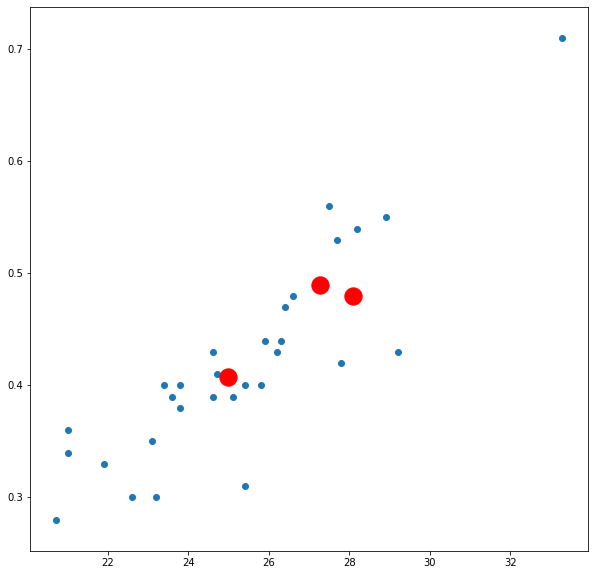

In [0]:
k_means(re_data1,colms,3)

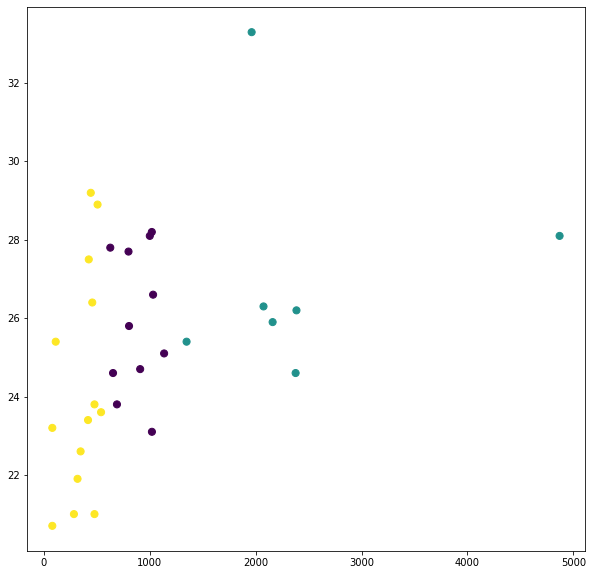

In [0]:
spectral(re_data1,colms,3)

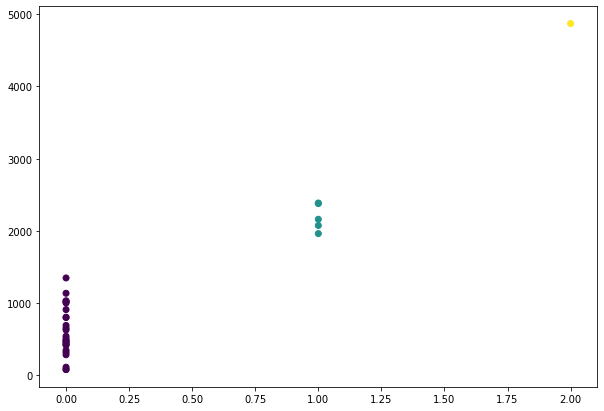

In [0]:
algo_cluster(re_data1[colms],3)

In [0]:
# Adding clustering markers to the map
fig = px.scatter_mapbox(re_data1, lat= 'Latitude', lon = 'Longitude', color = 'Spectral Cluster Labels', labels = 'Local Authority',text='Local Authority',
                        hover_data=['Spectral Cluster Labels'],
                        color_discrete_sequence= px.colors.sequential.Viridis, 
                        height=450, zoom= 4.25)
fig.update_traces(textposition='top center')
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Results of Clustering

In [0]:
merge3 = re_data1.merge(demo_data2,left_on='Local Authority',right_on='Places',how='inner')

In [0]:
merge3.drop(columns=['Latitude_x','Longitude_x'],axis=1).groupby(['Spectral Cluster Labels']).mean()

,Cluster Labels,Number of offenders,Reconviction rate,Average number of reconvictions per offender,Latitude_y,Longitude_y,NoofPlaces,Scottish only,Scottish and British only,British only,Other UK identities,Scottish and any other identities,Other only,Population,Electors,Area (km²),Density(per km²),Population-2001,Population-2011
Spectral Cluster Labels,,,,,,,,,,,,,,,,,,,
0,1.0,882.636364,25.954545,0.433636,NaN,NaN,108.545455,0.654273,0.178818,0.078091,0.044182,0.016364,0.028273,161786.363636,124790.727273,4468.890909,310.000000,150281.909091,159700.000000
1,0.5,2467.166667,27.533333,0.483333,57.149651,-2.099075,115.500000,0.651333,0.184667,0.069667,0.033167,0.016500,0.044833,338971.666667,253944.333333,664.521667,1413.666667,318061.500000,330016.666667
2,1.0,347.153846,24.215385,0.386154,NaN,NaN,123.384615,0.612154,0.185154,0.095308,0.061846,0.019846,0.025538,78060.000000,60494.384615,1857.784615,184.153846,74690.461538,76838.461538


# Granger Causality test

Granger causality test is used to determine if one time series will be useful to forecast another.

How does Granger causality test work?

It is based on the idea that if X causes Y, then the forecast of Y based on previous values of Y AND the previous values of X should outperform the forecast of Y based on previous values of Y alone.

So, understand that Granger causality should not be used to test if a lag of Y causes Y. Instead, it is generally used on exogenous (not Y lag) variables only.

It is nicely implemented in the statsmodel package.

It accepts a 2D array with 2 columns as the main argument. The values are in the first column and the predictor (X) is in the second column.

The Null hypothesis is: the series in the second column, does not Granger cause the series in the first. If the P-Values are less than a significance level (0.05) then you reject the null hypothesis and conclude that the said lag of X is indeed useful.

In [0]:
from statsmodels.tsa.stattools import grangercausalitytests

In [0]:
ti = civil_data2['1980-01-01':'2015-01-01']['CS_Total'].index

In [0]:
x1 = np.array(civil_data2['CS_Total']['1980-01-01':'2015-01-01'])
x2 = np.array(civil_data2['SC_Total']['1980-01-01':'2015-01-01'])
x3 = np.array(cp_data1['Total crimes']['1980-01-01':'2015-01-01'])
x4 = np.array(fa_data1['Total']['1980-01-01':'2015-01-01'])
x5 = np.array(ho_data1['Homicide Cases']['1980-01-01':'2015-01-01'])
x6 = np.array(ti)

In [0]:
df = pd.DataFrame([x1,x2,x3,x4,x5,x6])
df = df.transpose()
df.columns = ['CS_Total', 'SC_Total','Total crimes','Total','Homicide Cases','date']
df['year'] = df.date.dt.year
grangercausalitytests(df[['Total crimes', 'CS_Total']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.2632  , p=0.0176  , df_denom=32, df_num=1
ssr based chi2 test:   chi2=6.8503  , p=0.0089  , df=1
likelihood ratio test: chi2=6.2563  , p=0.0124  , df=1
parameter F test:         F=6.2632  , p=0.0176  , df_denom=32, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6090  , p=0.5507  , df_denom=29, df_num=2
ssr based chi2 test:   chi2=1.4280  , p=0.4897  , df=2
likelihood ratio test: chi2=1.3988  , p=0.4969  , df=2
parameter F test:         F=0.6090  , p=0.5507  , df_denom=29, df_num=2


{1: ({'lrtest': (6.256303986717171, 0.012375212083198318, 1),
   'params_ftest': (6.26315586335647, 0.01762833311233186, 32.0, 1.0),
   'ssr_chi2test': (6.850326725546102, 0.008862506390832218, 1),
   'ssr_ftest': (6.2631558633564355, 0.017628333112332157, 32.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (1.398795320659815, 0.496884506921379, 2),
   'params_ftest': (0.608986334093328, 0.5507110248441442, 29.0, 2.0),
   'ssr_chi2test': (1.4279679558050815, 0.48968939437408443, 2),
   'ssr_ftest': (0.6089863340933436, 0.5507110248441369, 29.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In the above case, the P-Values are increasing with number of lags for all tests. So the ‘CS_Total’ cannot be used to forecast the Total crimes.

In [0]:
grangercausalitytests(df[['Total crimes', 'SC_Total']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=16.5882 , p=0.0003  , df_denom=32, df_num=1
ssr based chi2 test:   chi2=18.1433 , p=0.0000  , df=1
likelihood ratio test: chi2=14.6175 , p=0.0001  , df=1
parameter F test:         F=16.5882 , p=0.0003  , df_denom=32, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.6409  , p=0.0388  , df_denom=29, df_num=2
ssr based chi2 test:   chi2=8.5374  , p=0.0140  , df=2
likelihood ratio test: chi2=7.6168  , p=0.0222  , df=2
parameter F test:         F=3.6409  , p=0.0388  , df_denom=29, df_num=2


{1: ({'lrtest': (14.61753270505676, 0.00013168370703074518, 1),
   'params_ftest': (16.58815098969909, 0.00028527484729433904, 32.0, 1.0),
   'ssr_chi2test': (18.143290144364247, 2.0489009001355972e-05, 1),
   'ssr_ftest': (16.588150989133027, 0.0002852748473502767, 32.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (7.616765958502924, 0.02218402199361002, 2),
   'params_ftest': (3.6409384596460614, 0.03883914462756131, 29.0, 2.0),
   'ssr_chi2test': (8.537372939843543, 0.014000160713153947, 2),
   'ssr_ftest': (3.640938459639158, 0.03883914462777556, 29.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In the above case, the P-Values are less than 0.05 with number of lags for all tests. So the ‘SC_Total’ can be used to forecast the Total crimes.

In [0]:
grangercausalitytests(df[['Total crimes', 'Total']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7339  , p=0.3980  , df_denom=32, df_num=1
ssr based chi2 test:   chi2=0.8027  , p=0.3703  , df=1
likelihood ratio test: chi2=0.7936  , p=0.3730  , df=1
parameter F test:         F=0.7339  , p=0.3980  , df_denom=32, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6433  , p=0.5329  , df_denom=29, df_num=2
ssr based chi2 test:   chi2=1.5085  , p=0.4704  , df=2
likelihood ratio test: chi2=1.4760  , p=0.4781  , df=2
parameter F test:         F=0.6433  , p=0.5329  , df_denom=29, df_num=2


{1: ({'lrtest': (0.7936093177360135, 0.37301097361264446, 1),
   'params_ftest': (0.7338743557362233, 0.39800027697456775, 32.0, 1.0),
   'ssr_chi2test': (0.8026750765865356, 0.37029476719594534, 1),
   'ssr_ftest': (0.733874355736261, 0.3980002769745571, 32.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (1.475978067114056, 0.4780743409626269, 2),
   'params_ftest': (0.6433239133398344, 0.532878820403603, 29.0, 2.0),
   'ssr_chi2test': (1.508483658865888, 0.4703670980653404, 2),
   'ssr_ftest': (0.643323913339864, 0.5328788204035877, 29.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In the above case, the P-Values are greater than 0.05 with number of lags for all tests. So the fire arms offence ‘Total’ cannot be used to forecast the Total crimes.

In [0]:
grangercausalitytests(df[['Total crimes', 'Homicide Cases']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.4266 , p=0.0013  , df_denom=32, df_num=1
ssr based chi2 test:   chi2=13.5916 , p=0.0002  , df=1
likelihood ratio test: chi2=11.4836 , p=0.0007  , df=1
parameter F test:         F=12.4266 , p=0.0013  , df_denom=32, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.6868  , p=0.0082  , df_denom=29, df_num=2
ssr based chi2 test:   chi2=13.3346 , p=0.0013  , df=2
likelihood ratio test: chi2=11.2499 , p=0.0036  , df=2
parameter F test:         F=5.6868  , p=0.0082  , df_denom=29, df_num=2


{1: ({'lrtest': (11.483625620647558, 0.0007021202816121848, 1),
   'params_ftest': (12.426648994215967, 0.0013010460672557844, 32.0, 1.0),
   'ssr_chi2test': (13.591647337423595, 0.00022719416778402372, 1),
   'ssr_ftest': (12.426648994215858, 0.0013010460672558358, 32.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (11.249919083595842, 0.003606709054027669, 2),
   'params_ftest': (5.686793883690783, 0.008248205568182553, 29.0, 2.0),
   'ssr_chi2test': (13.334551175550802, 0.001271859103643311, 2),
   'ssr_ftest': (5.686793883690783, 0.008248205568182553, 29.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In the above case, the P-Values are less than 0.05 with number of lags for all tests. So the ‘Homicide Cases’ can be used to forecast the Total crimes.